Let us do some univariate analysis in this notebook and build simple regression models.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
# import kagglegym

%matplotlib inline

# Read the train file from H5 file

In [ ]:
with pd.HDFStore("train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    train = train.get("train")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710756 entries, 0 to 1710755
Columns: 111 entries, id to y
dtypes: float32(109), int16(2)
memory usage: 730.9 MB


In [4]:
null_counts = {}
for col in train.columns:
    nulls = train[col].isnull().sum()
    null_counts[col] = nulls

In [5]:
null_counts_sorted = sorted(null_counts.items(), key=lambda x : x[1])

In [6]:
null_counts_sorted

[('technical_22', 0),
 ('technical_34', 0),
 ('timestamp', 0),
 ('y', 0),
 ('id', 0),
 ('technical_21', 2236),
 ('technical_40', 2236),
 ('technical_7', 2236),
 ('technical_19', 2320),
 ('technical_27', 2420),
 ('technical_36', 2552),
 ('technical_35', 3155),
 ('technical_17', 4279),
 ('technical_2', 4279),
 ('technical_11', 4279),
 ('technical_6', 4279),
 ('technical_43', 4686),
 ('technical_13', 4764),
 ('technical_20', 4764),
 ('technical_30', 4764),
 ('fundamental_33', 13835),
 ('technical_14', 14184),
 ('technical_33', 14535),
 ('fundamental_18', 15833),
 ('fundamental_48', 15843),
 ('fundamental_36', 15843),
 ('fundamental_59', 16062),
 ('fundamental_45', 16062),
 ('technical_9', 19165),
 ('technical_12', 19165),
 ('technical_38', 19165),
 ('technical_37', 19165),
 ('technical_0', 19165),
 ('technical_32', 19165),
 ('technical_16', 19981),
 ('technical_42', 20001),
 ('technical_18', 20016),
 ('technical_39', 20016),
 ('fundamental_42', 22913),
 ('fundamental_0', 23947),
 ('fundam

# Extract Feature cols

In [3]:
excluded = ['id', 'y', 'timestamp']
feature_cols = [col for col in train.columns if col not in excluded]
feature_cols

['derived_0',
 'derived_1',
 'derived_2',
 'derived_3',
 'derived_4',
 'fundamental_0',
 'fundamental_1',
 'fundamental_2',
 'fundamental_3',
 'fundamental_5',
 'fundamental_6',
 'fundamental_7',
 'fundamental_8',
 'fundamental_9',
 'fundamental_10',
 'fundamental_11',
 'fundamental_12',
 'fundamental_13',
 'fundamental_14',
 'fundamental_15',
 'fundamental_16',
 'fundamental_17',
 'fundamental_18',
 'fundamental_19',
 'fundamental_20',
 'fundamental_21',
 'fundamental_22',
 'fundamental_23',
 'fundamental_24',
 'fundamental_25',
 'fundamental_26',
 'fundamental_27',
 'fundamental_28',
 'fundamental_29',
 'fundamental_30',
 'fundamental_31',
 'fundamental_32',
 'fundamental_33',
 'fundamental_34',
 'fundamental_35',
 'fundamental_36',
 'fundamental_37',
 'fundamental_38',
 'fundamental_39',
 'fundamental_40',
 'fundamental_41',
 'fundamental_42',
 'fundamental_43',
 'fundamental_44',
 'fundamental_45',
 'fundamental_46',
 'fundamental_47',
 'fundamental_48',
 'fundamental_49',
 'fundam

# y distribution

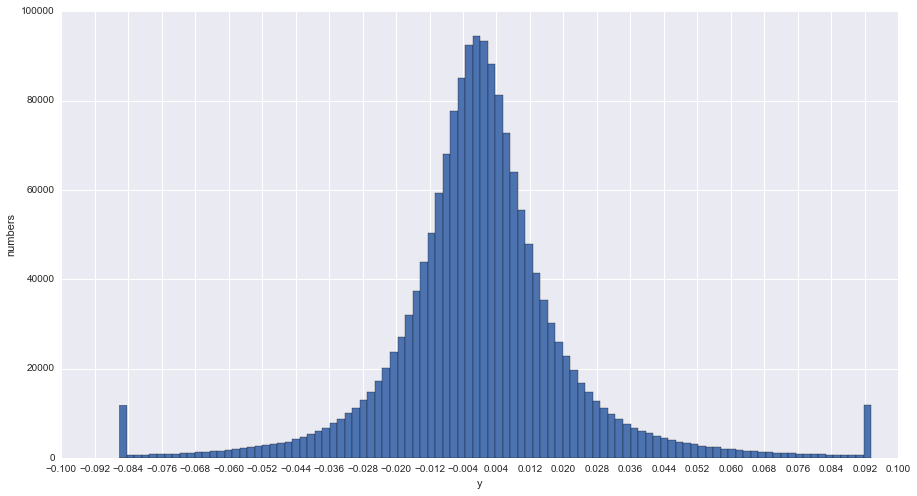

In [8]:
fig = plt.figure(figsize=(15, 8))
plt.hist(train.y, bins=100, label='y')
plt.xticks([0.008*x-0.1 for x in range(26)])
plt.xlabel('y')
plt.ylabel('numbers')

# let's see how stock behave with timestamp  

In [9]:
def plot_stock_behave(stock_id, lift=0):
    if not isinstance(stock_id, list):
        stock_id = [stock_id]
    plt.figure(figsize=(15,9))
    for ind, id in enumerate(stock_id):
        plt.title('stock ' + str(id))
        time = train[train['id']==id]['timestamp']
        y = train[train['id']==id]['y'] + ind * lift
        plt.plot(time, y, label='y')
        for col in feature_cols:          
            tech = train[train['id']==id][col] + ind * lift
            plt.plot(time, tech, label=col)
    plt.legend(loc='best')

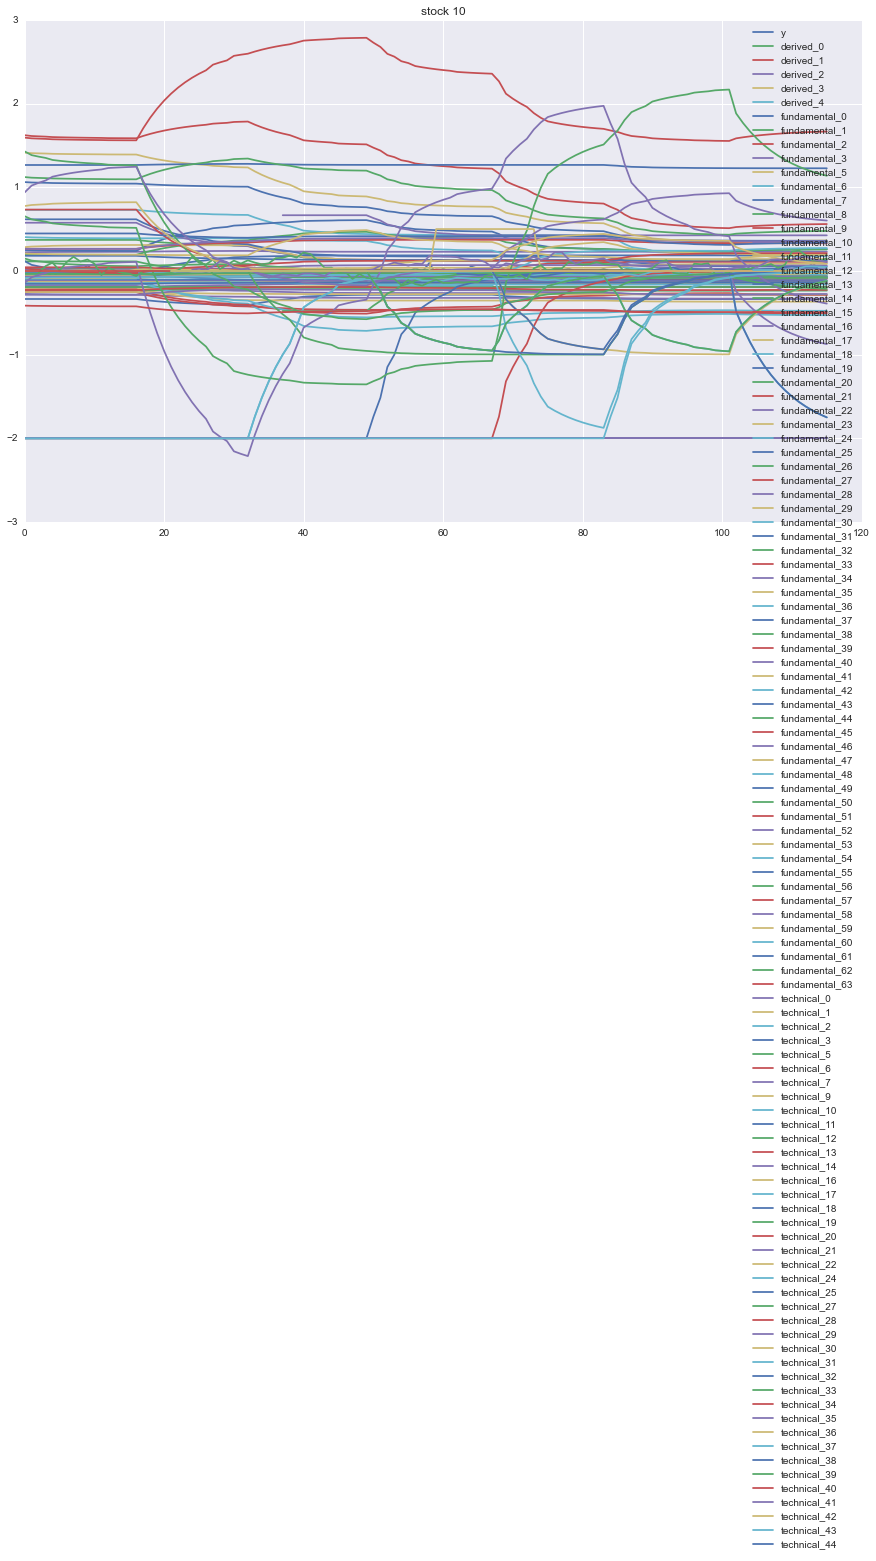

In [10]:
ids = [10]
plot_stock_behave(ids, 0.1)

# How missing feature affect y 

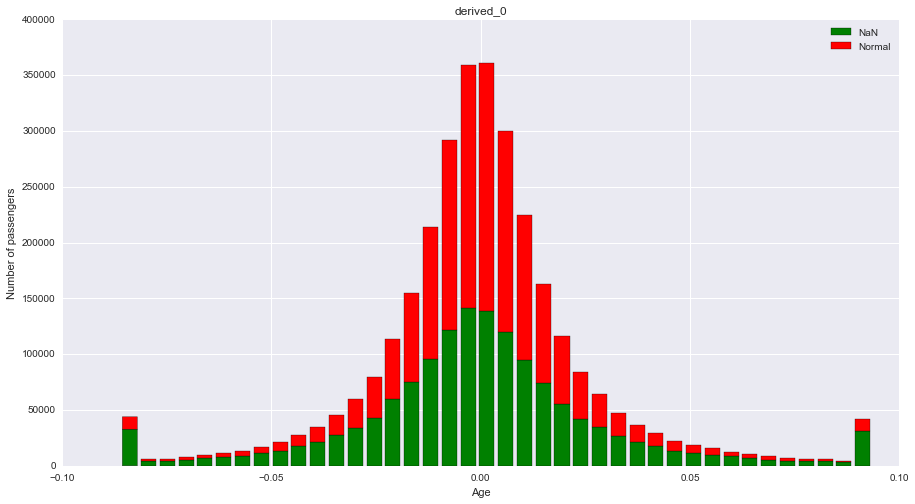

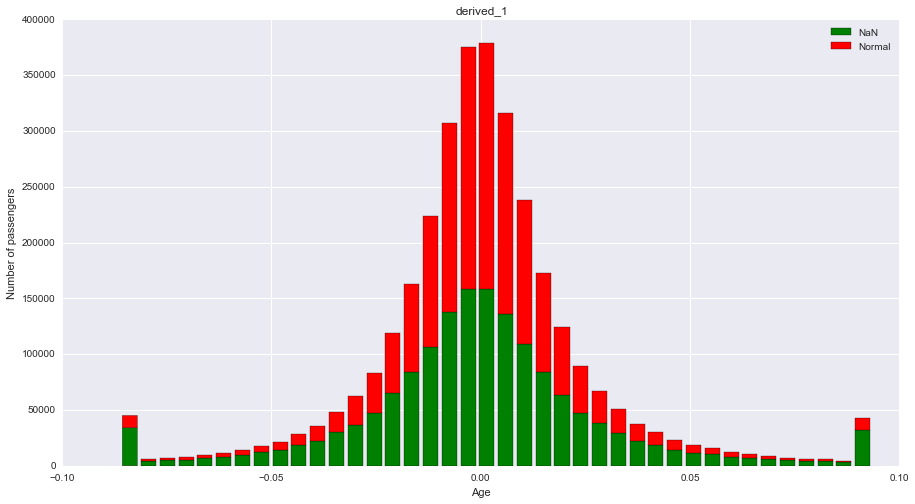

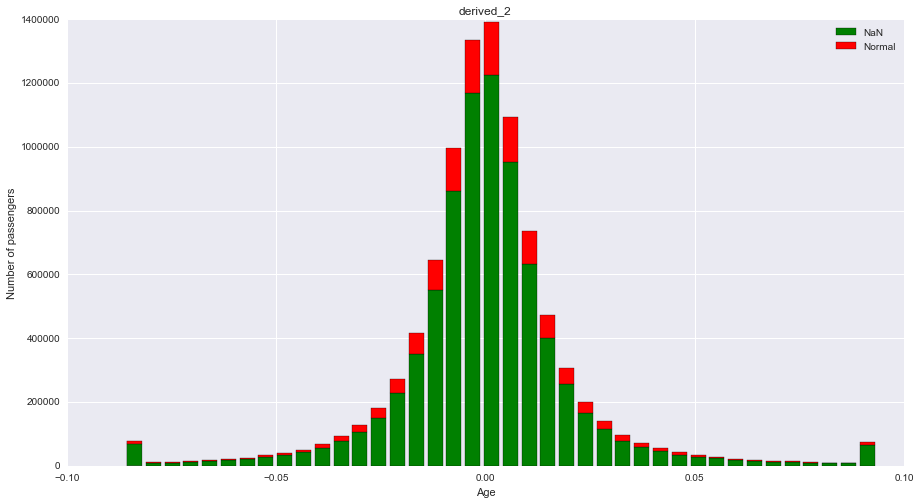

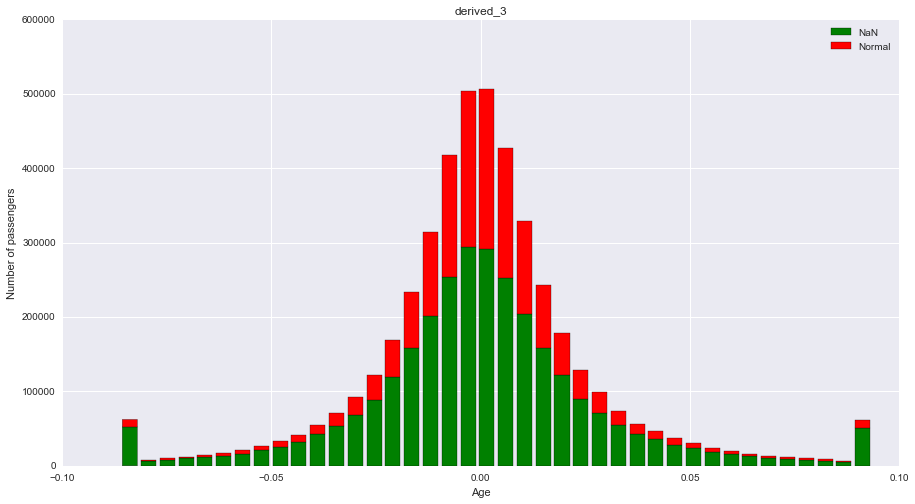

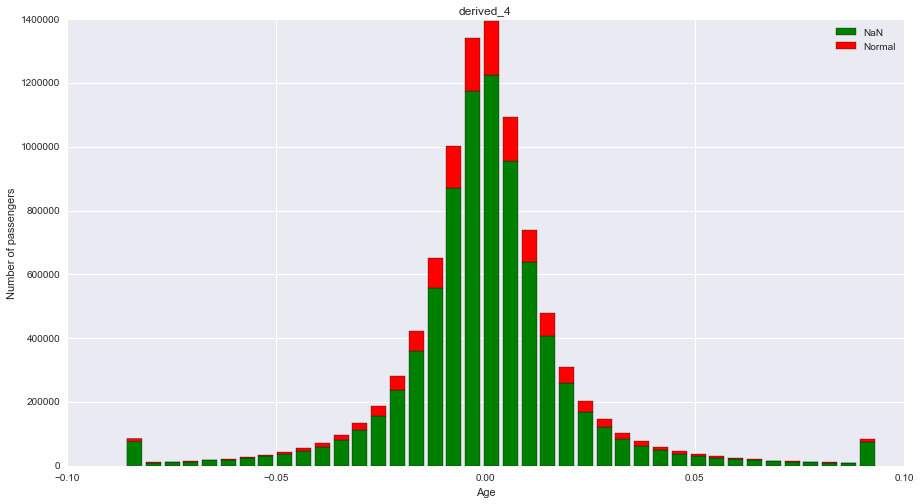

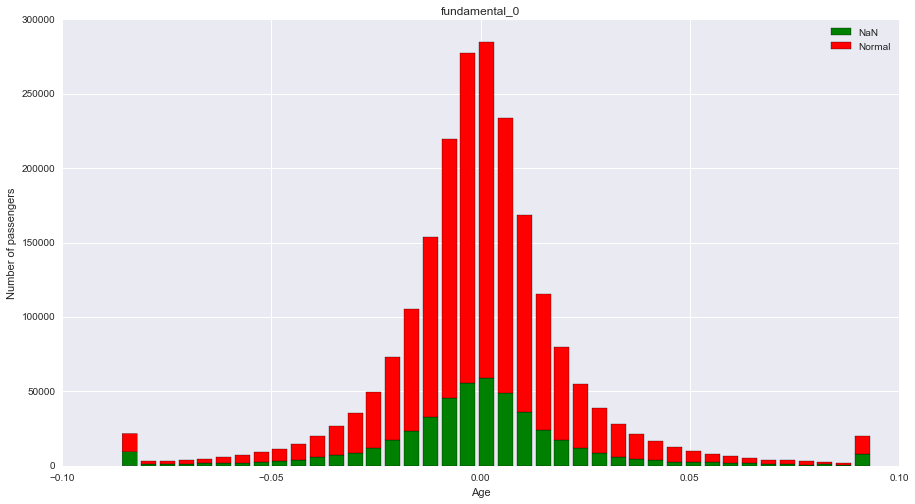

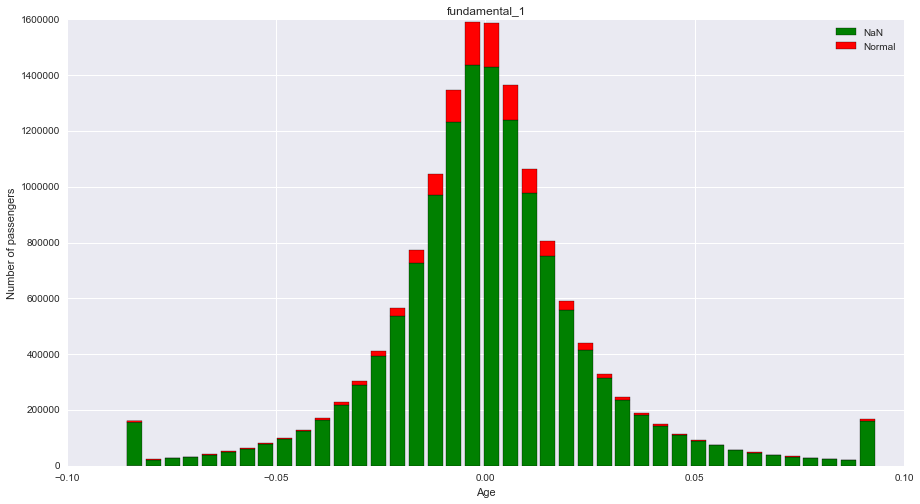

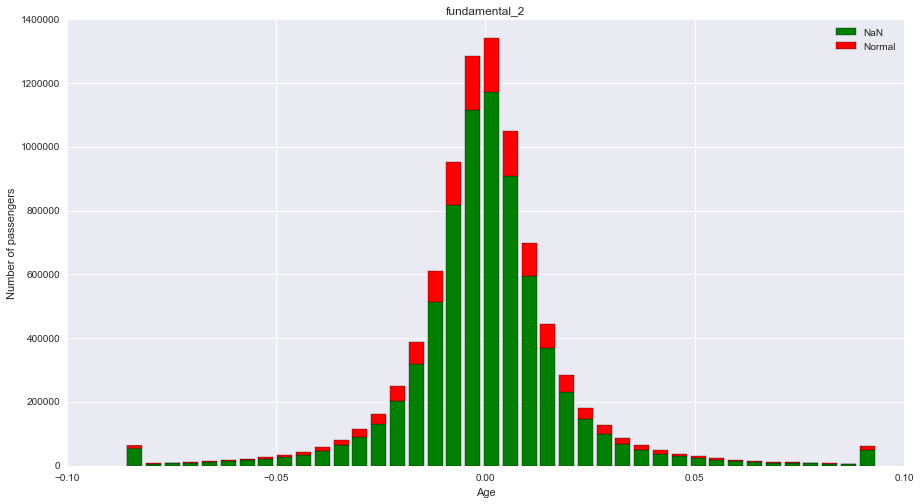

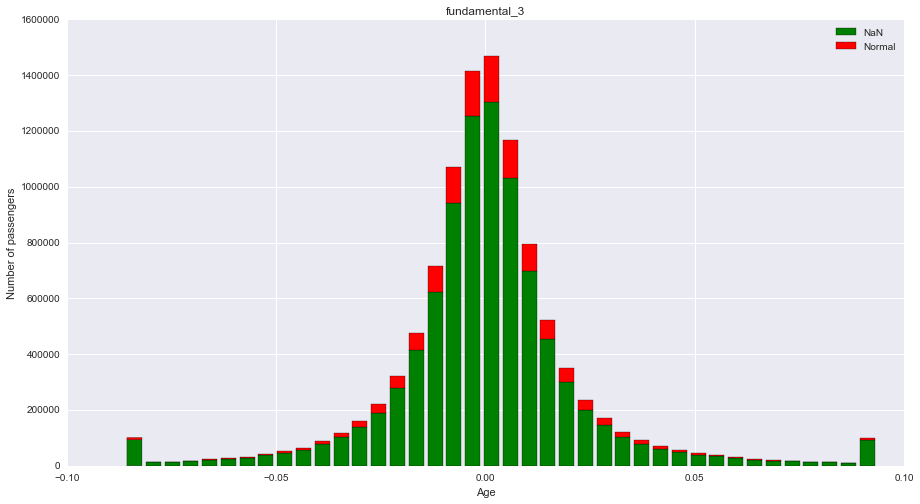

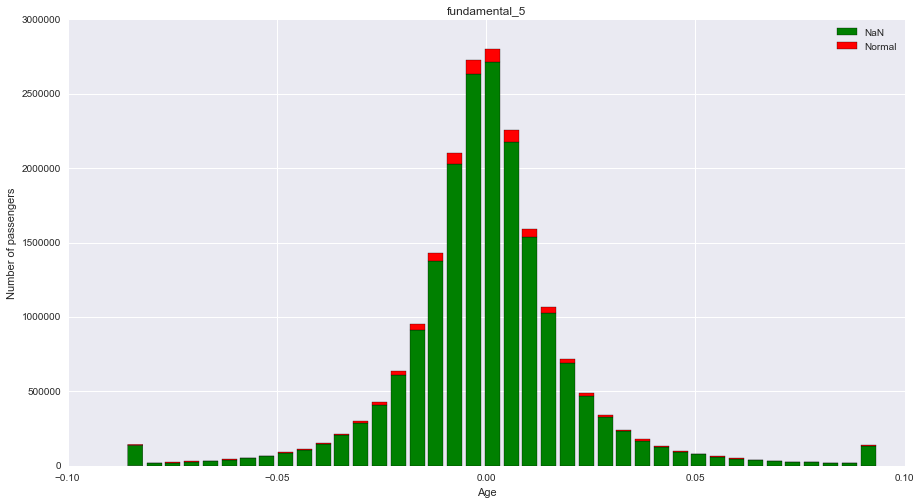

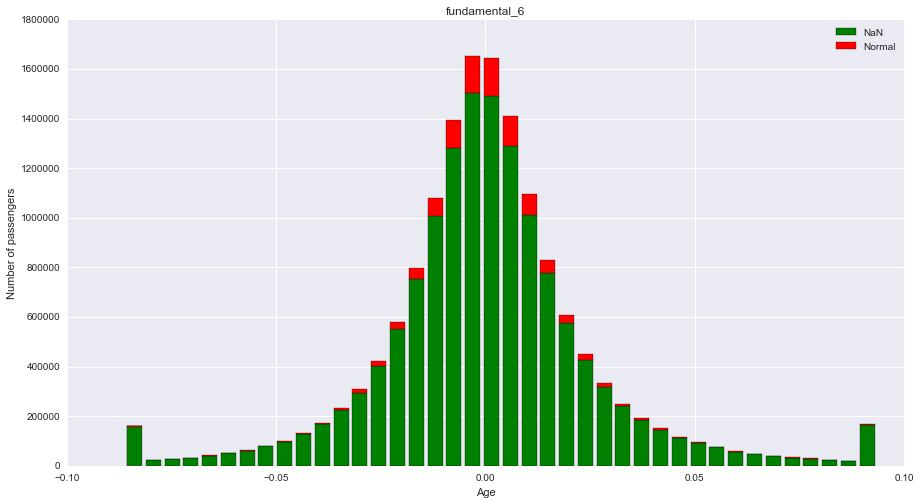

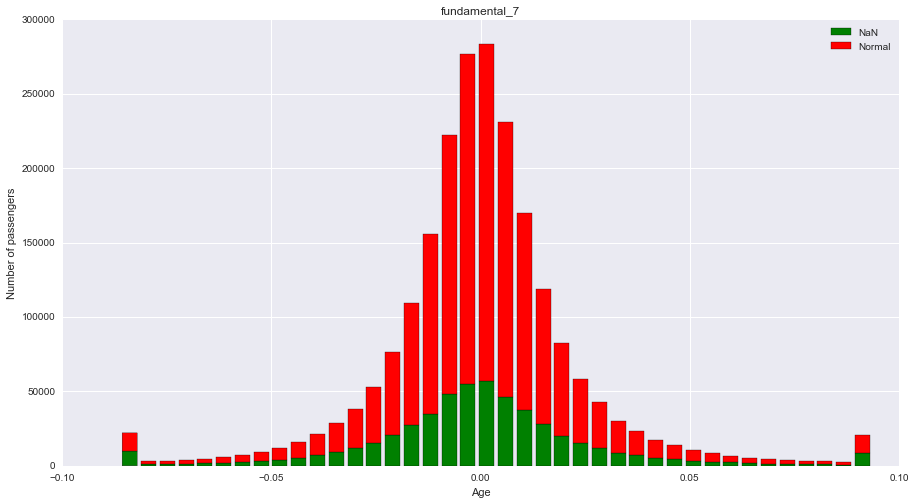

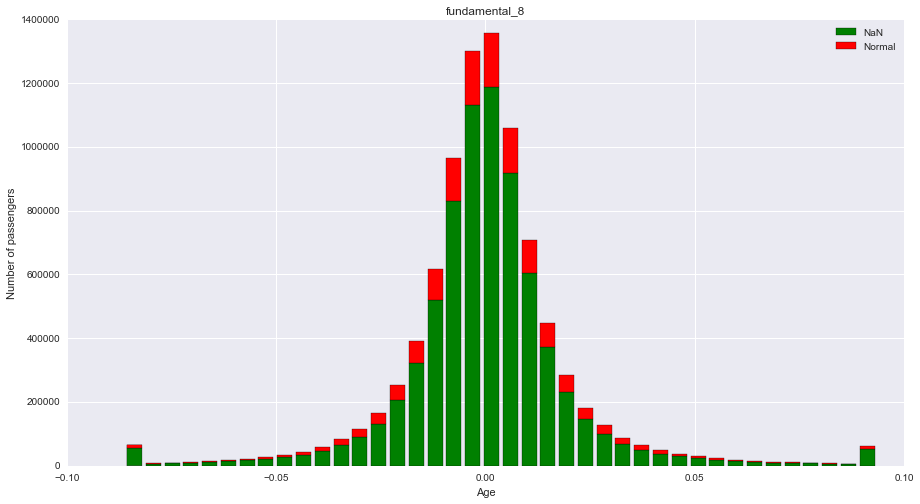

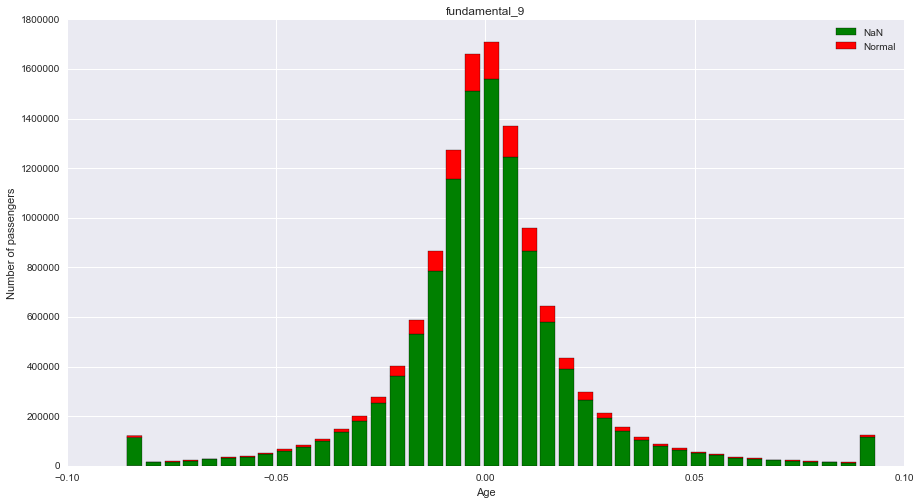

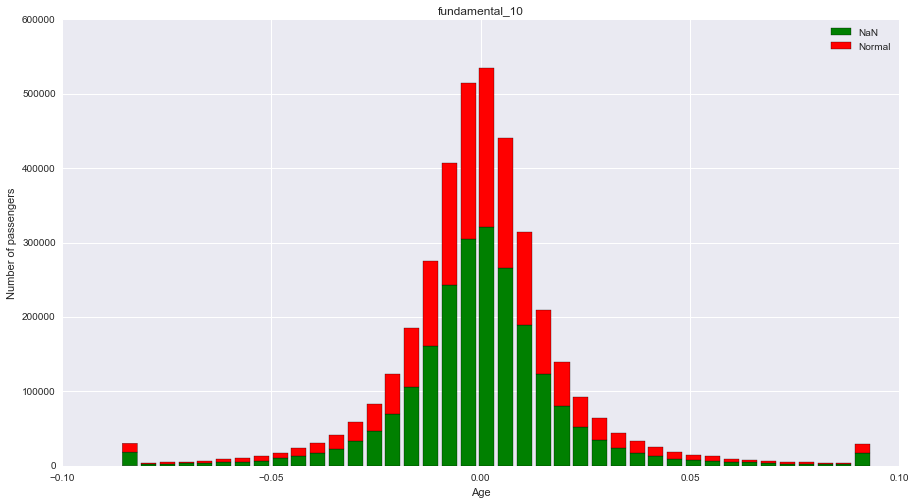

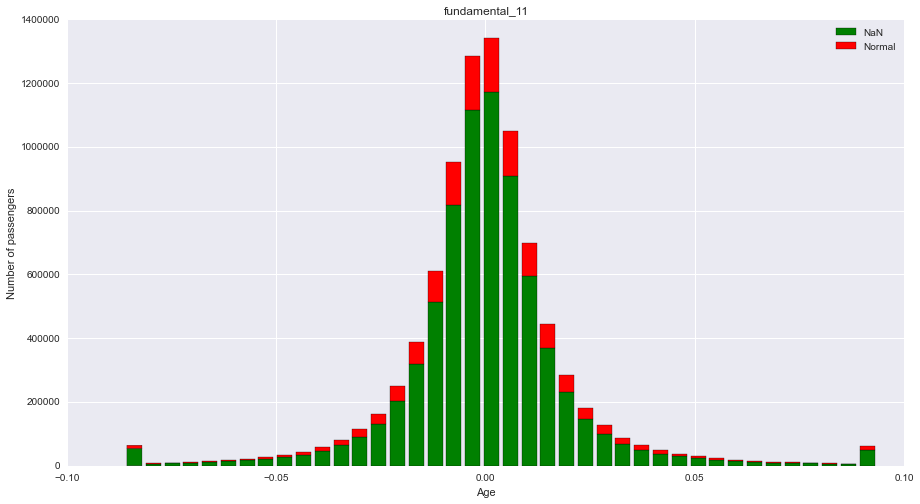

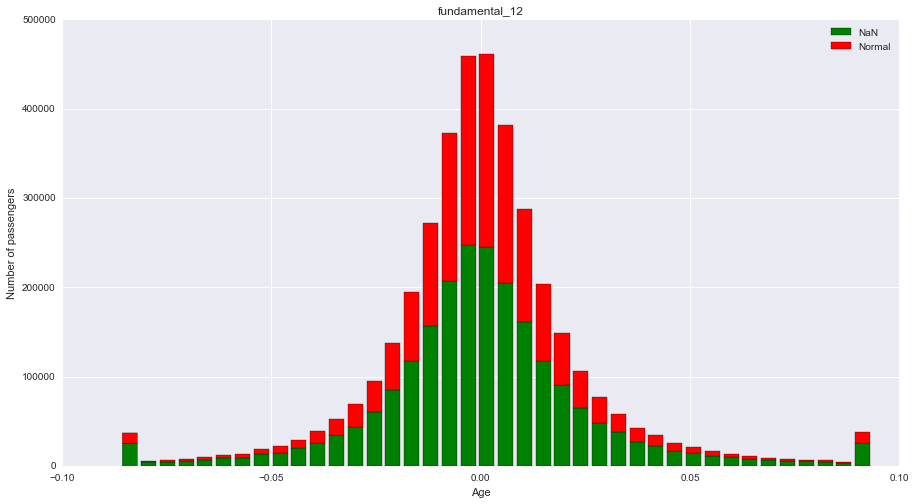

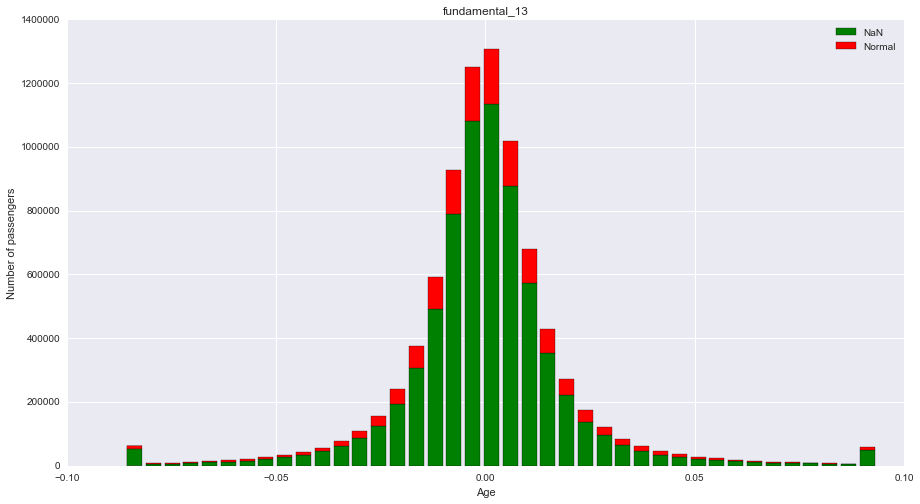

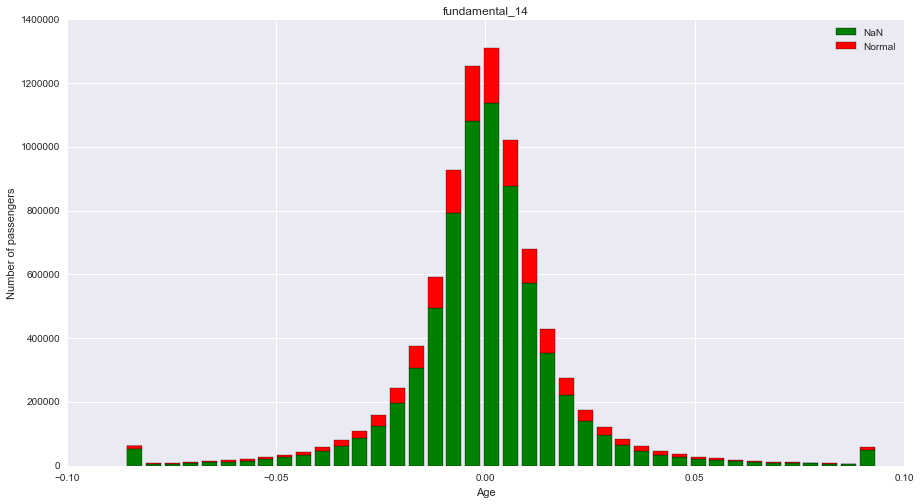

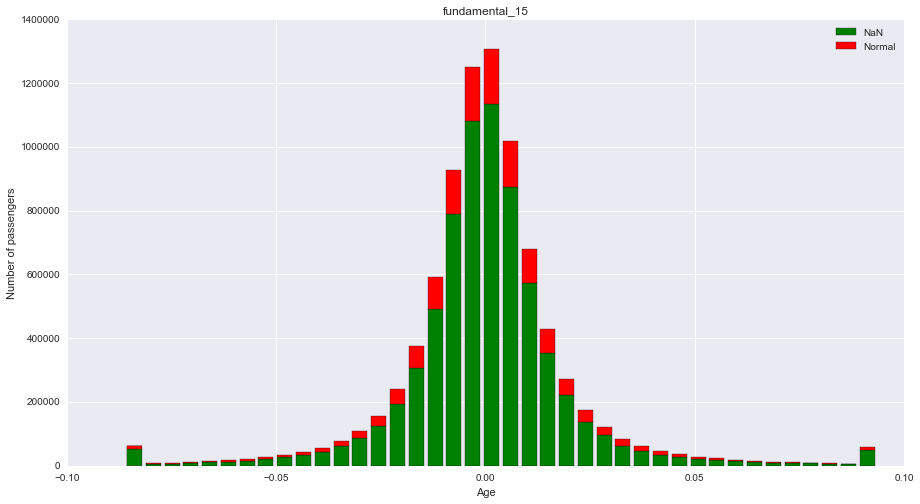

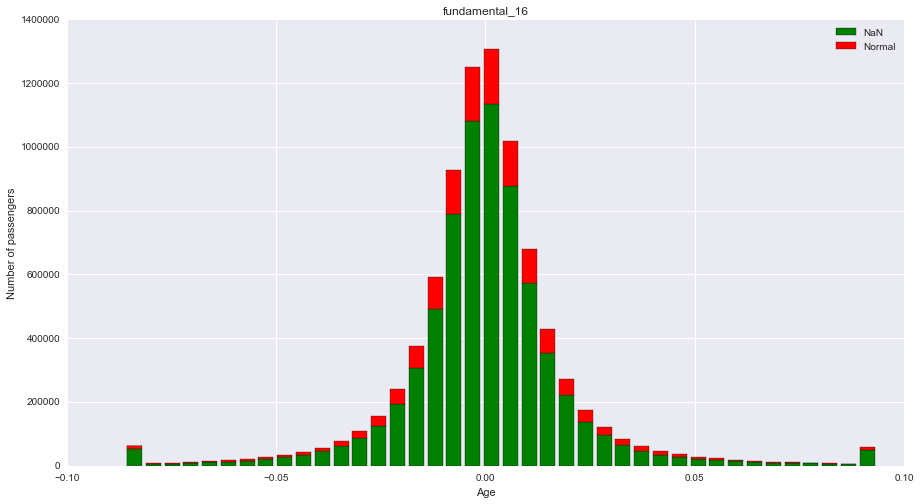

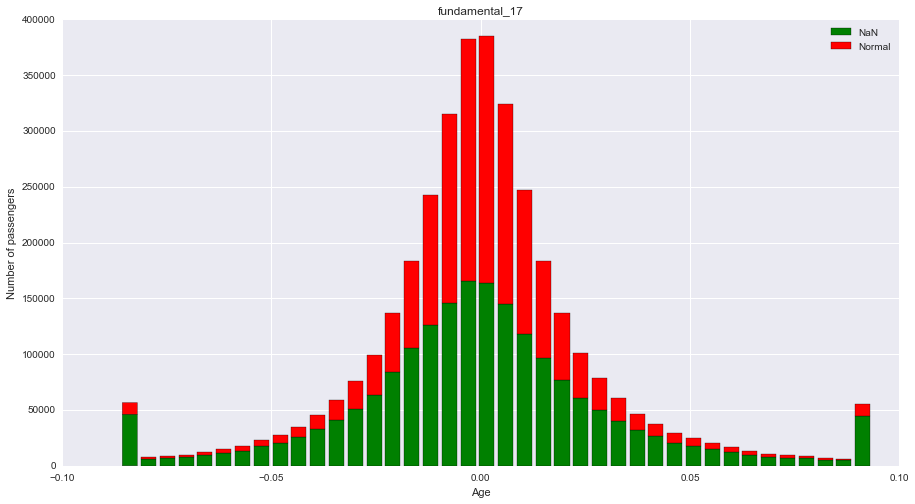

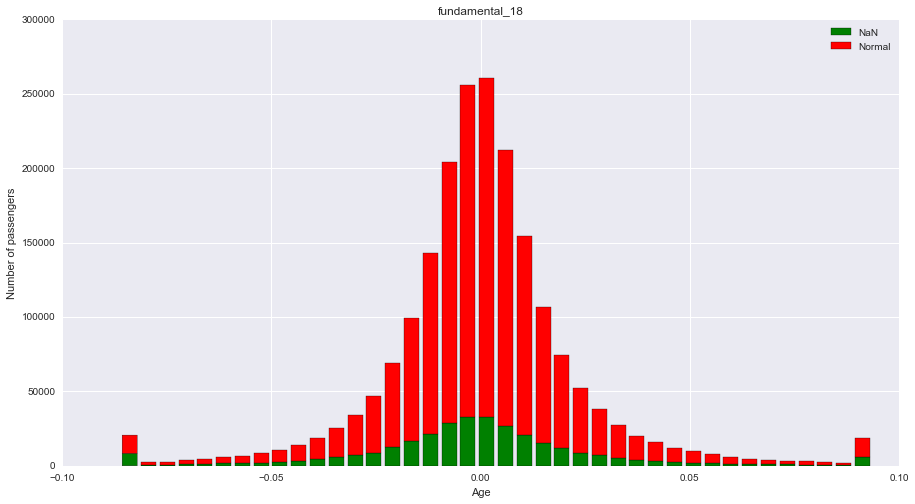

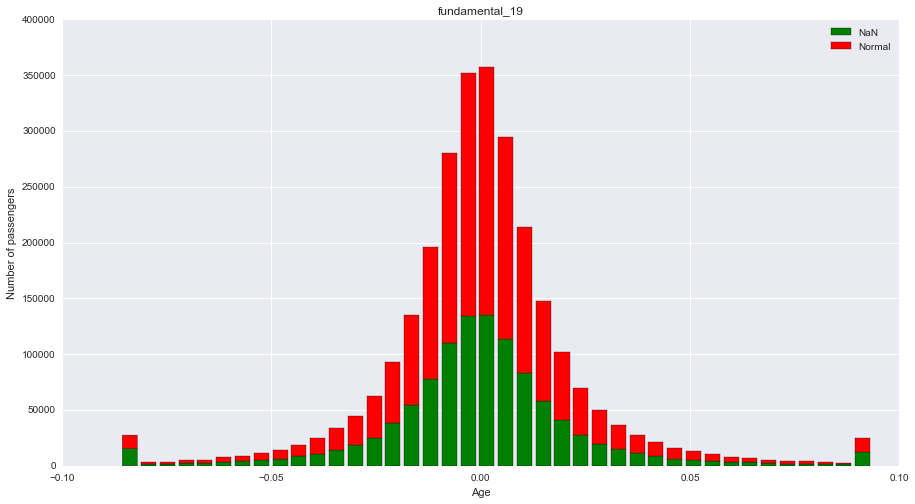

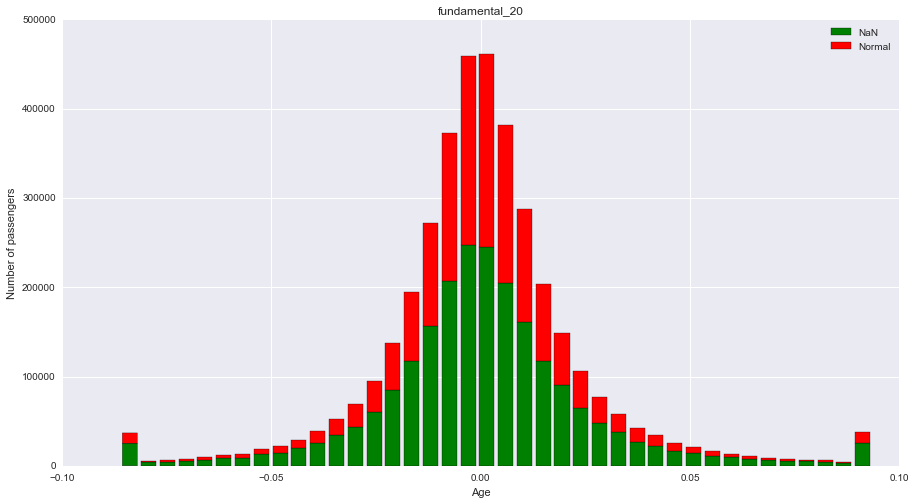

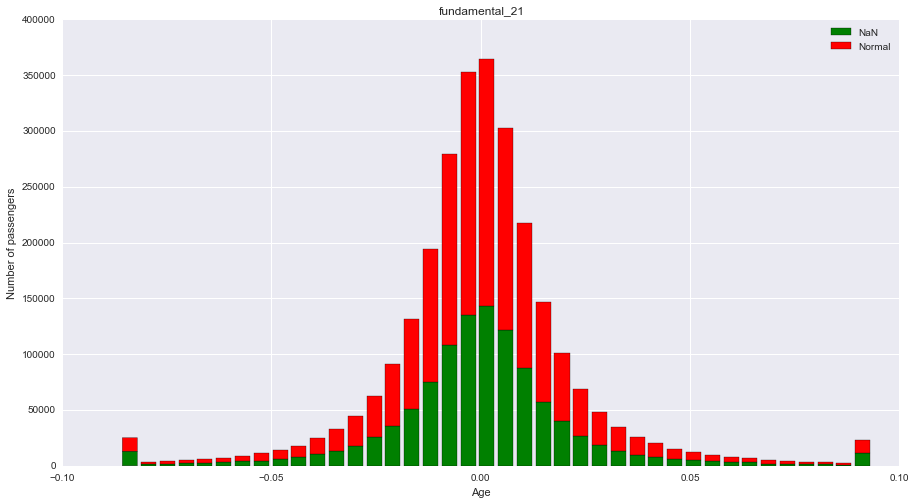

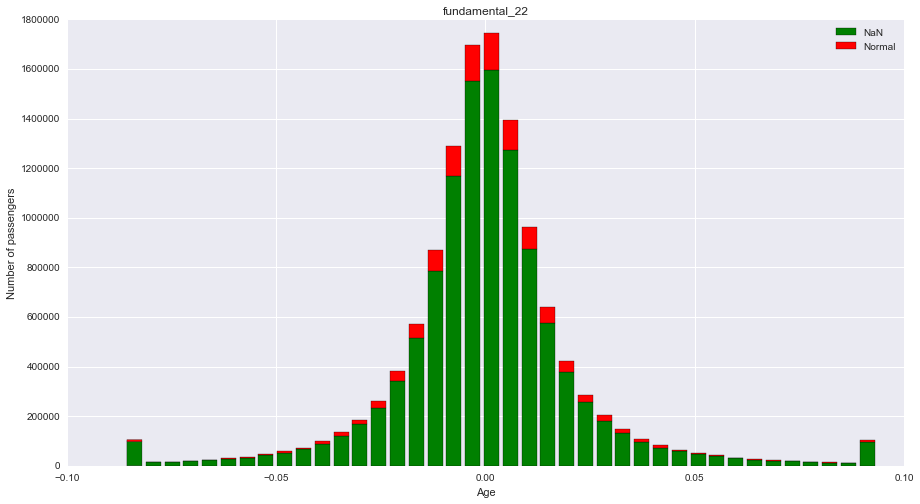

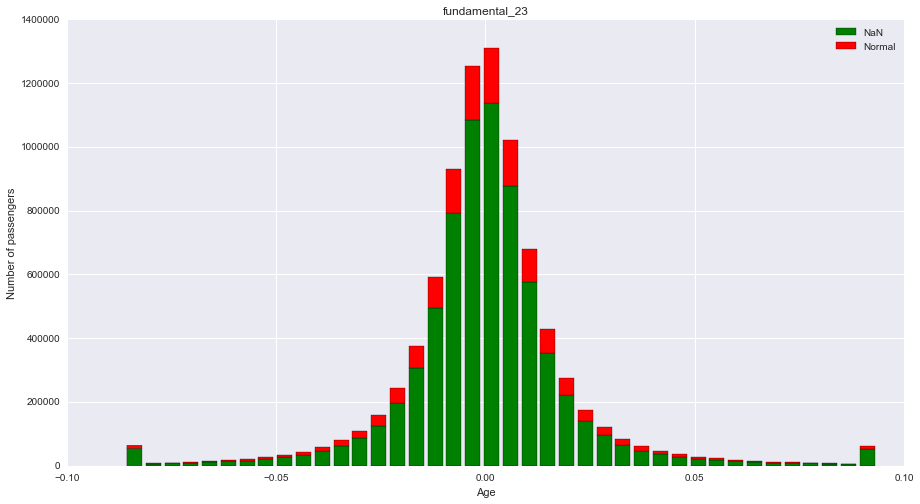

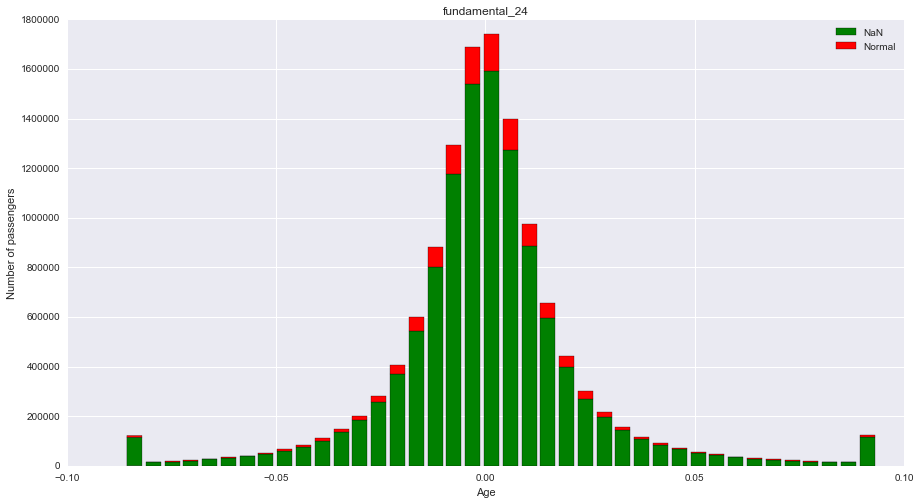

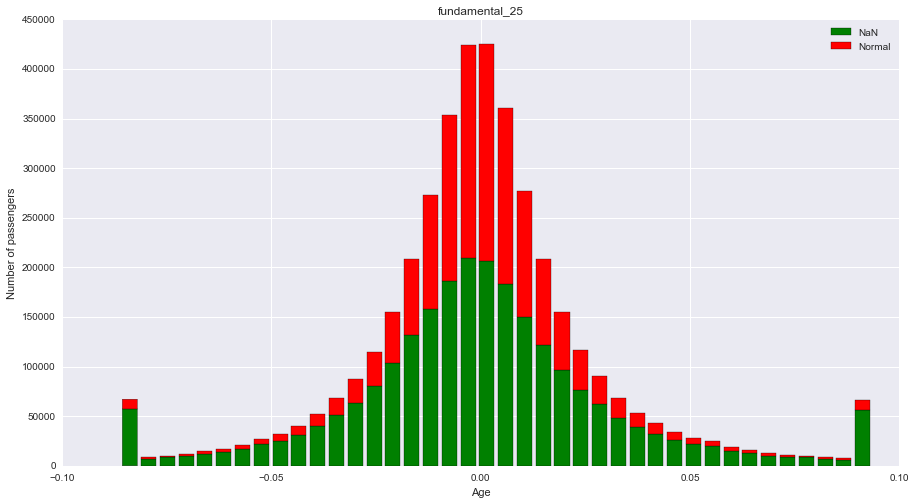

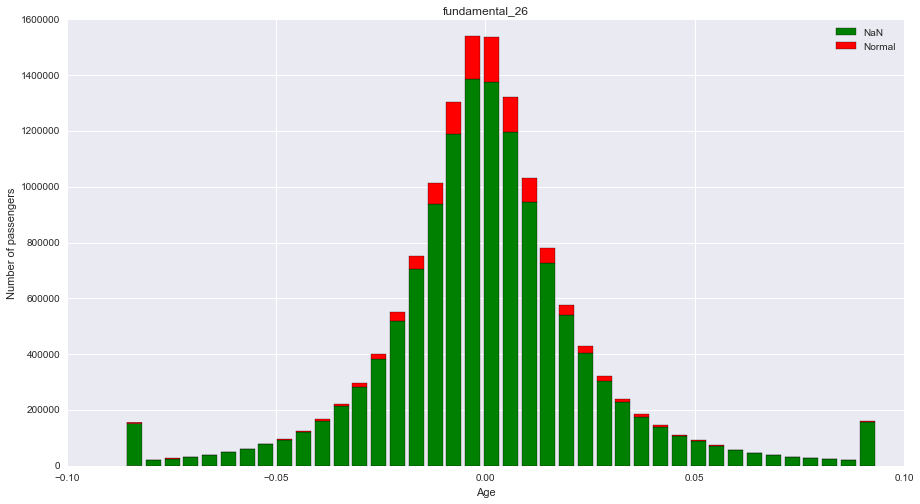

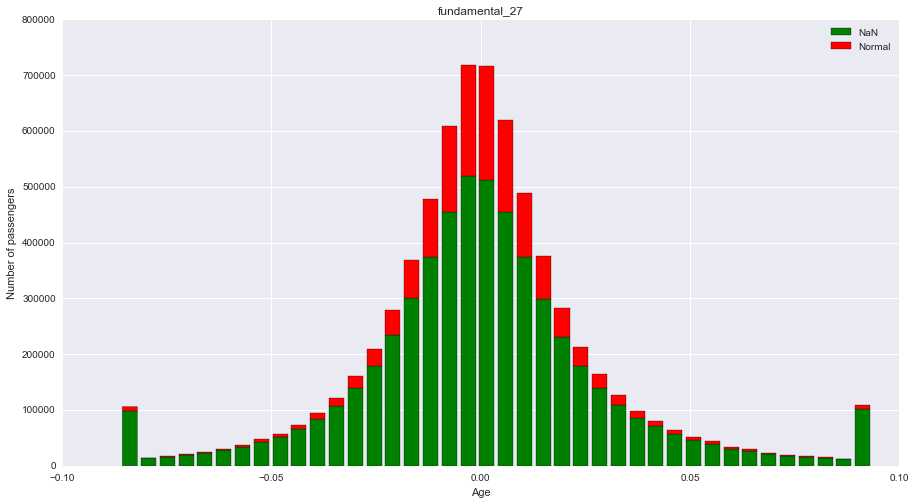

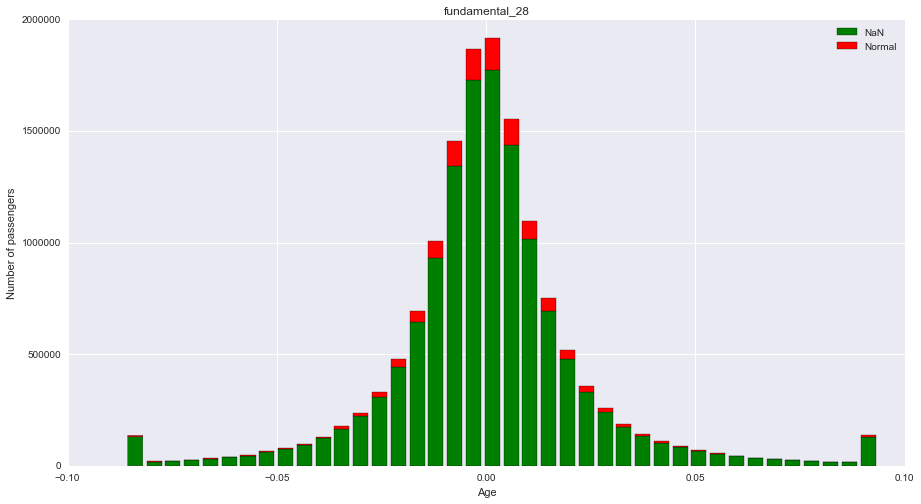

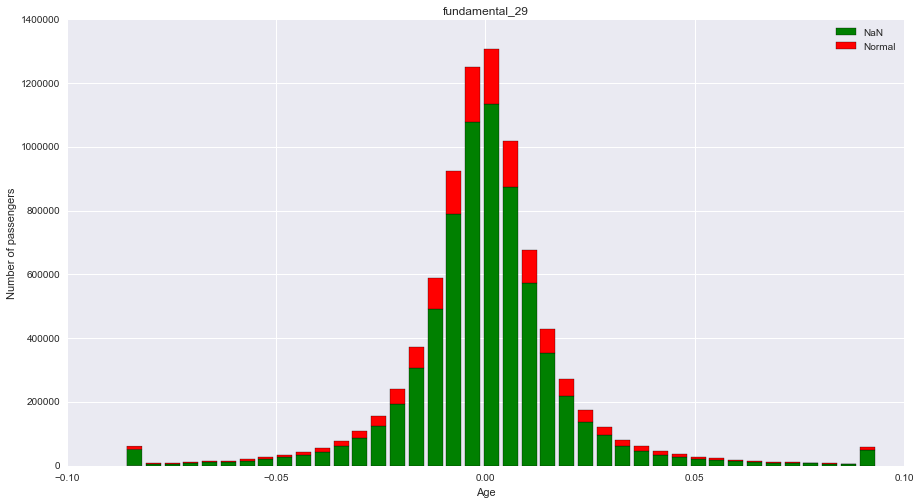

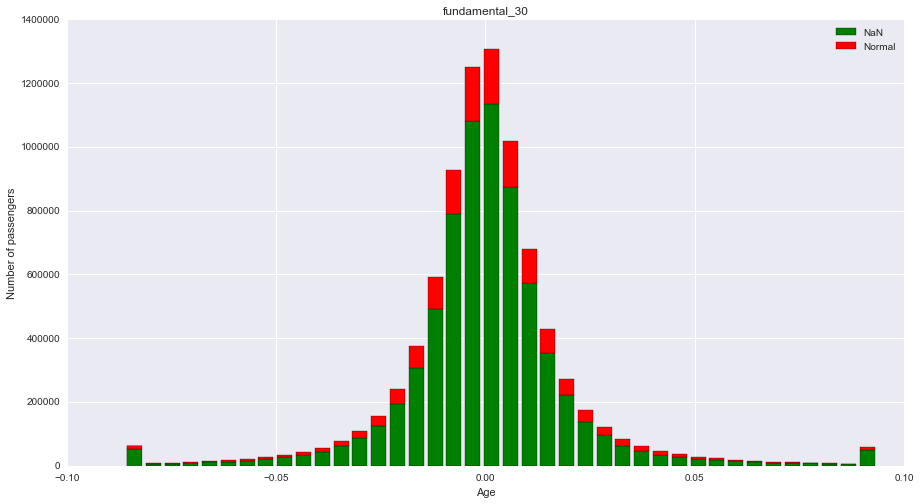

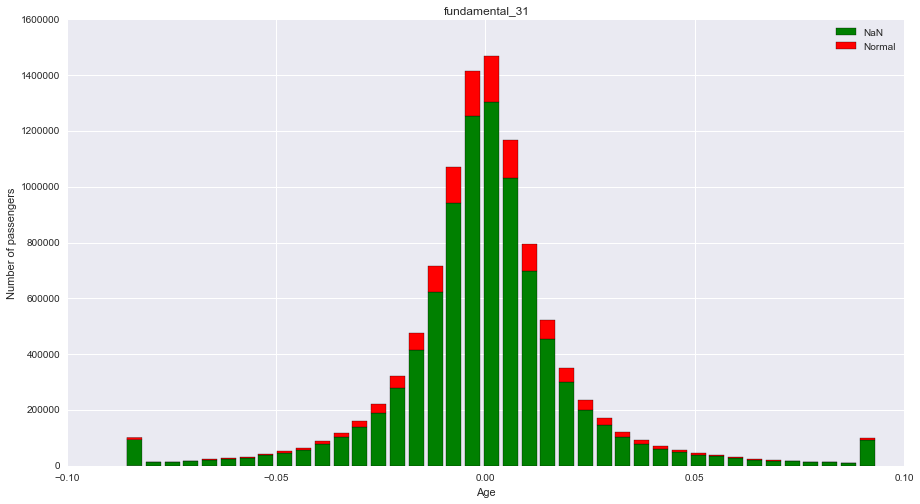

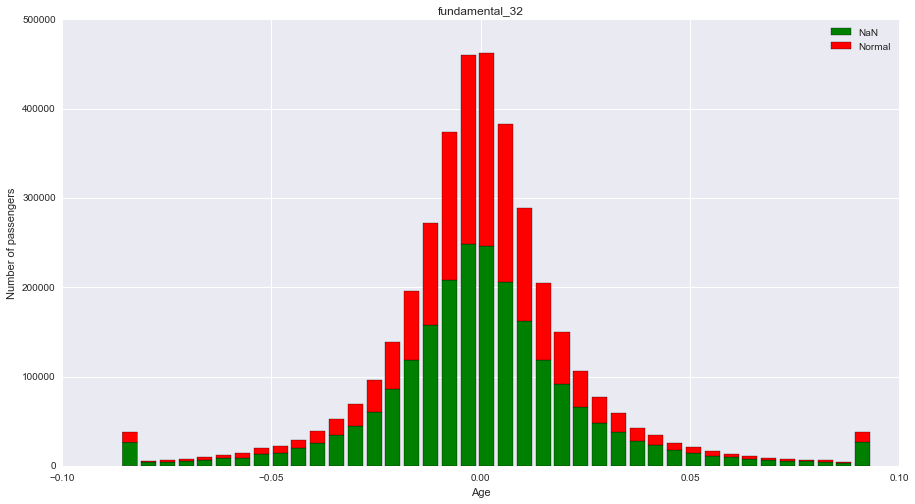

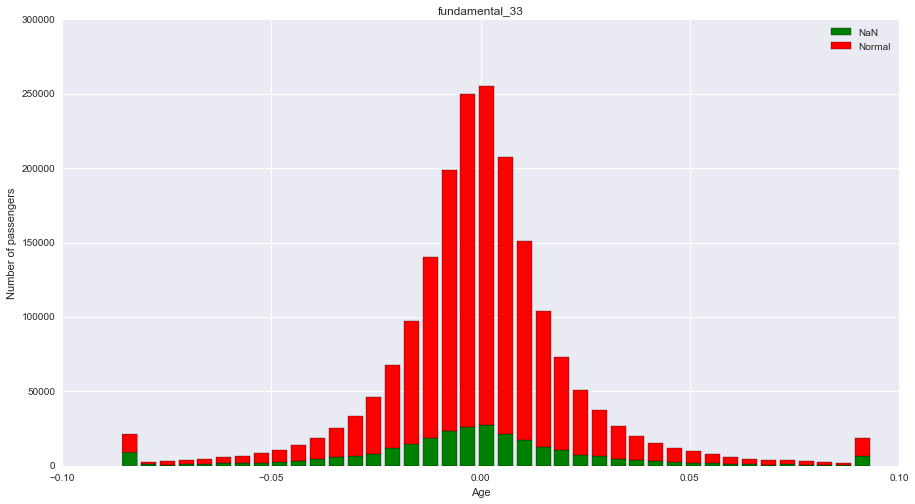

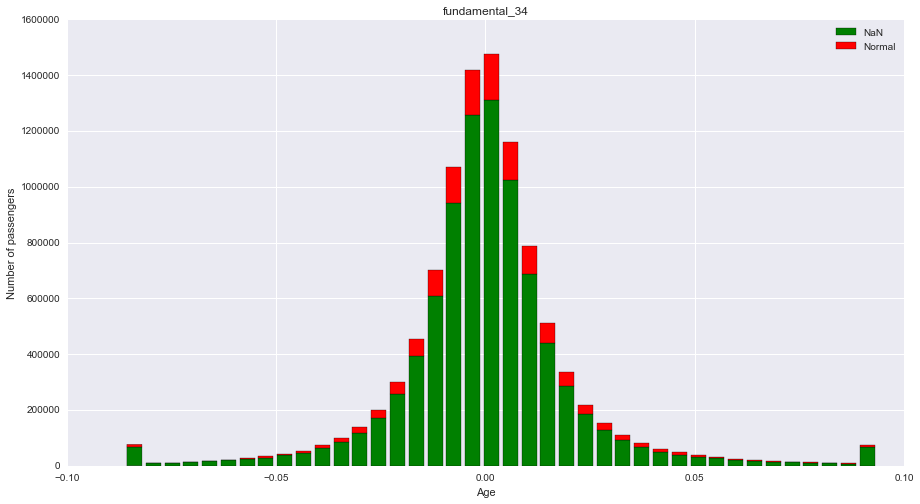

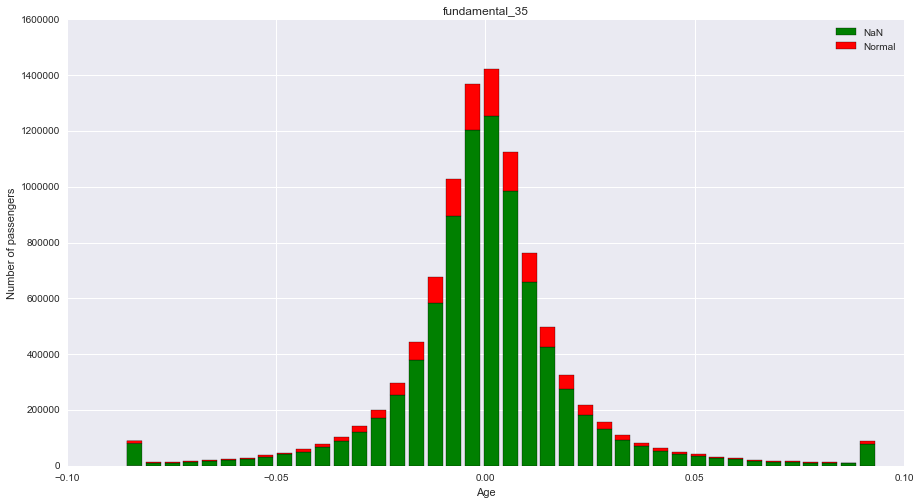

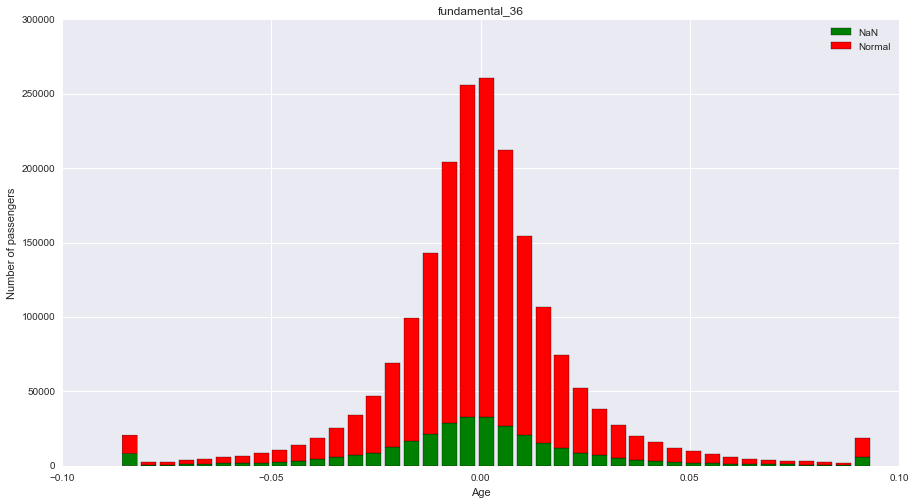

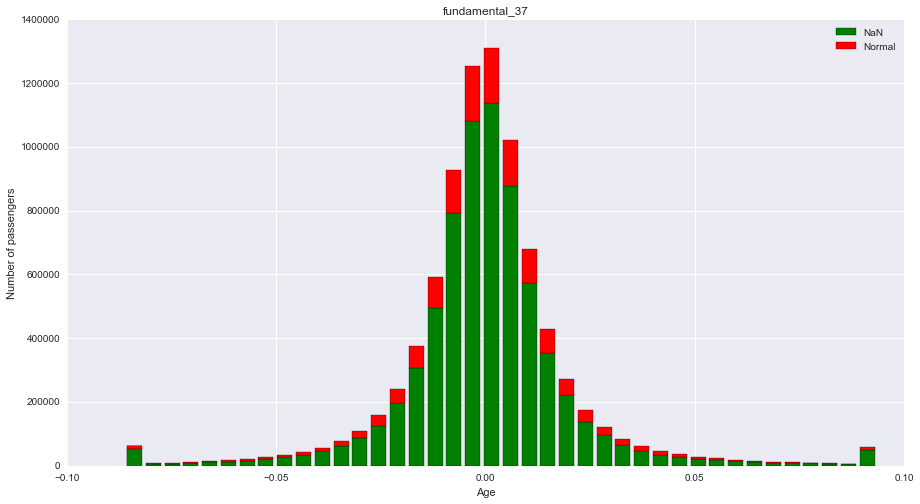

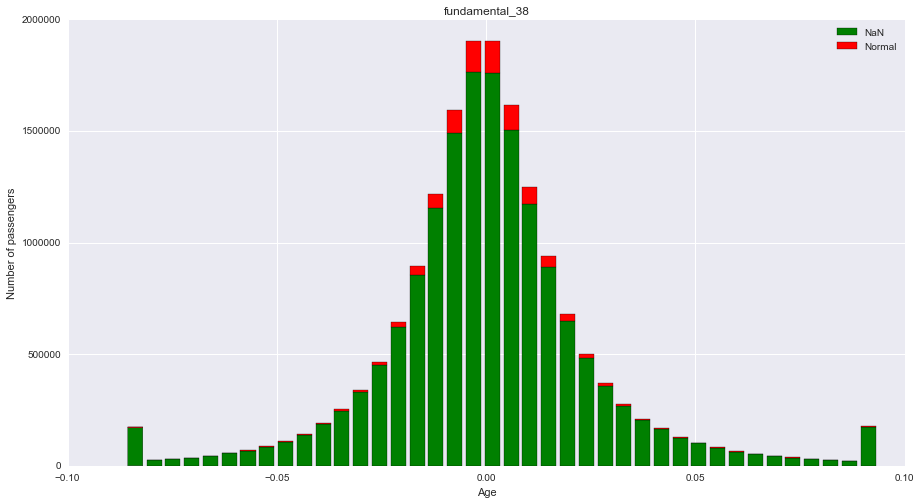

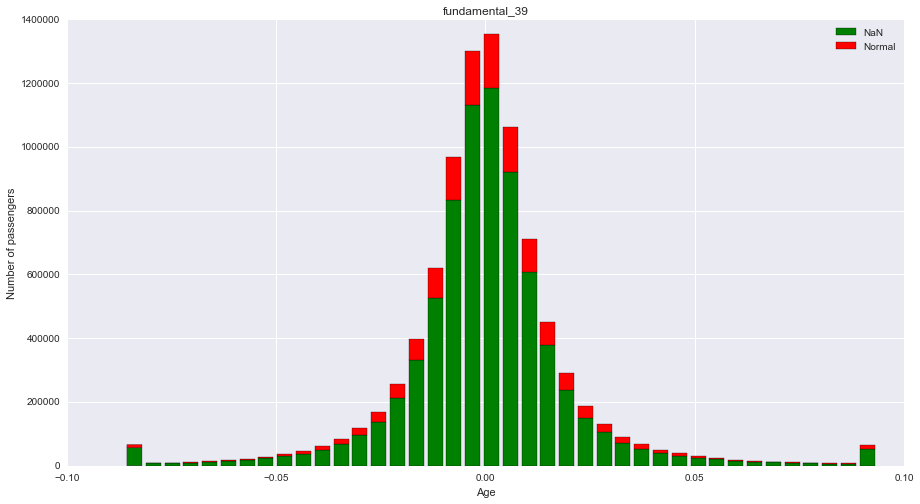

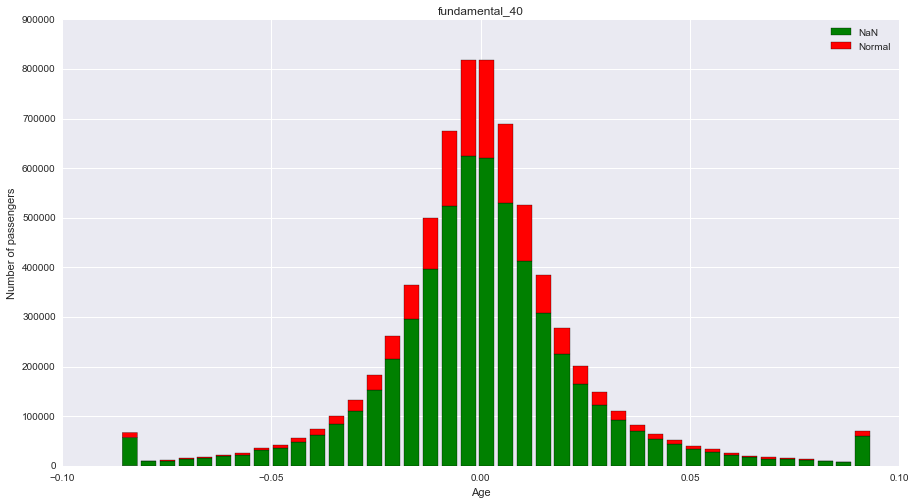

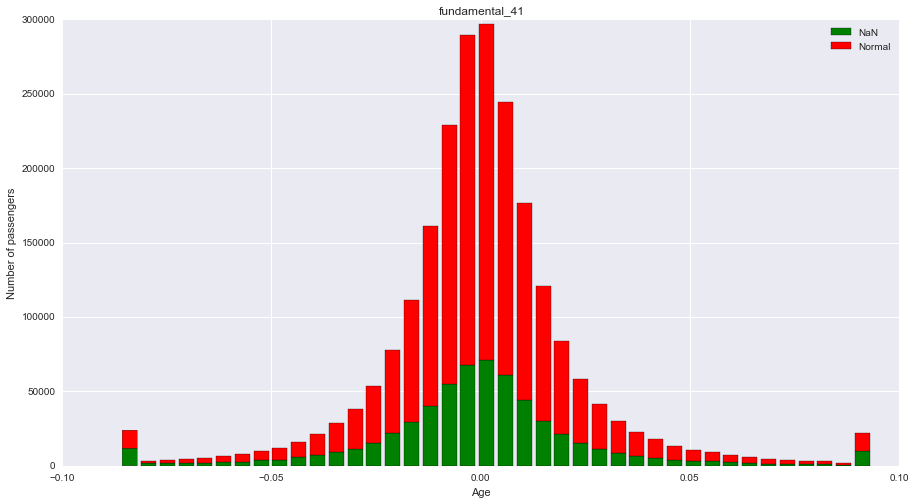

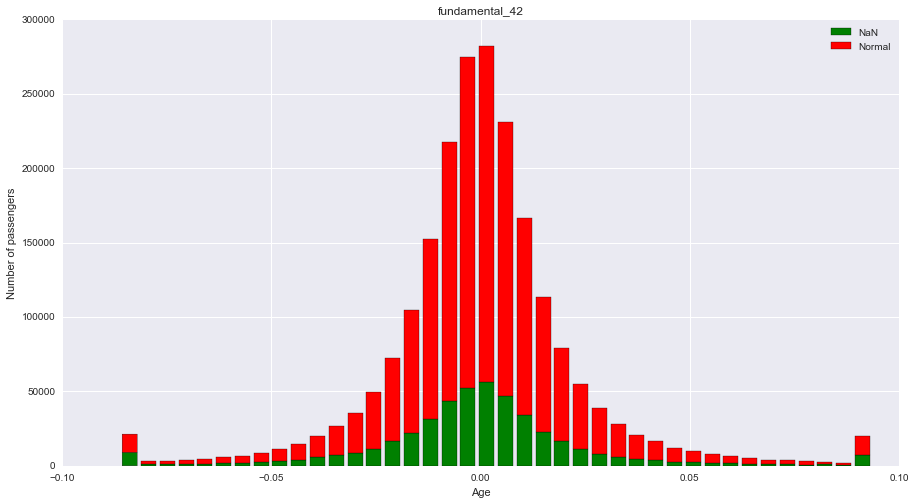

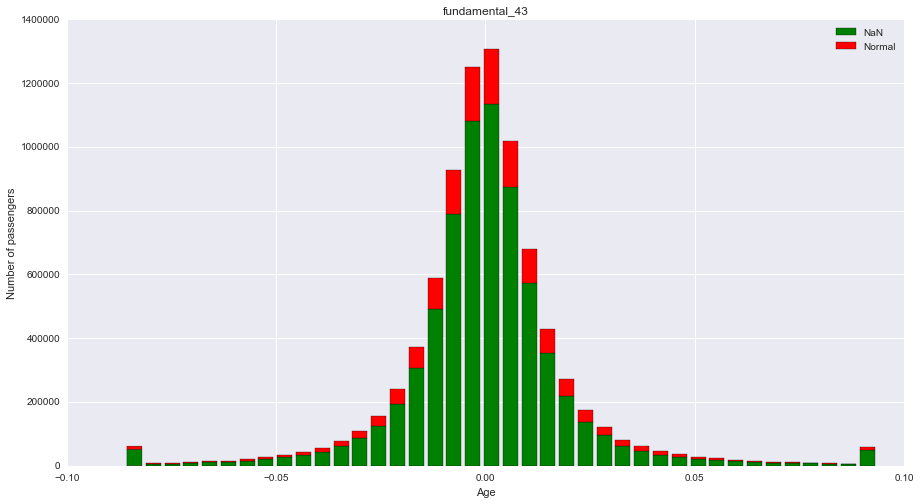

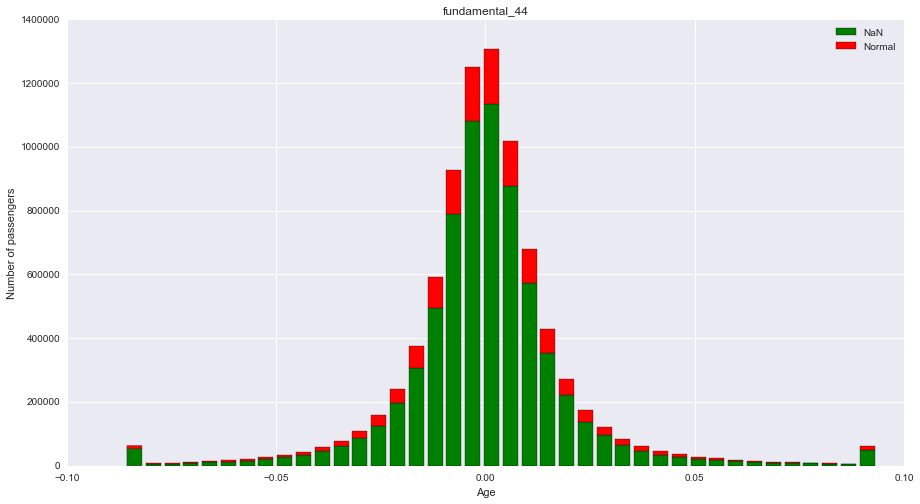

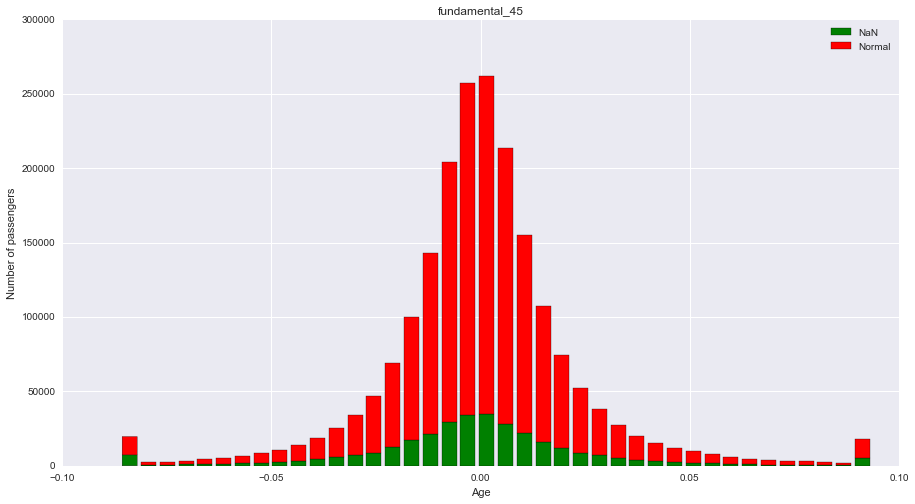

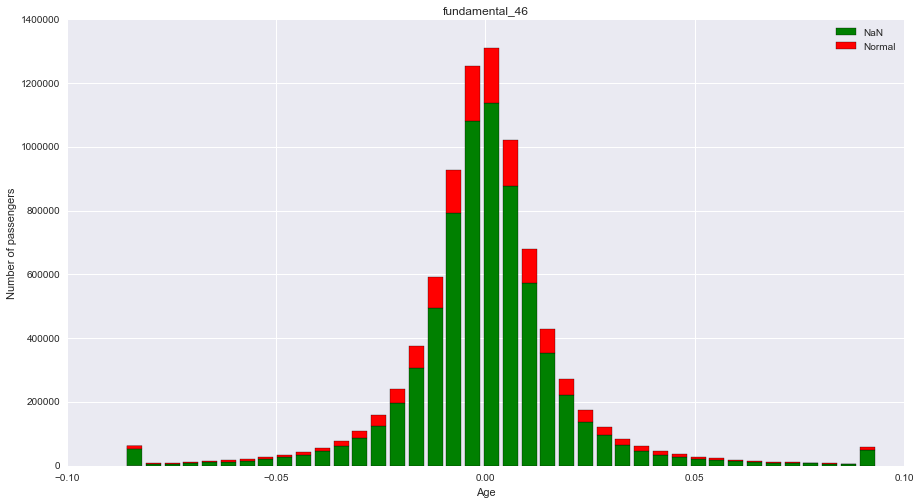

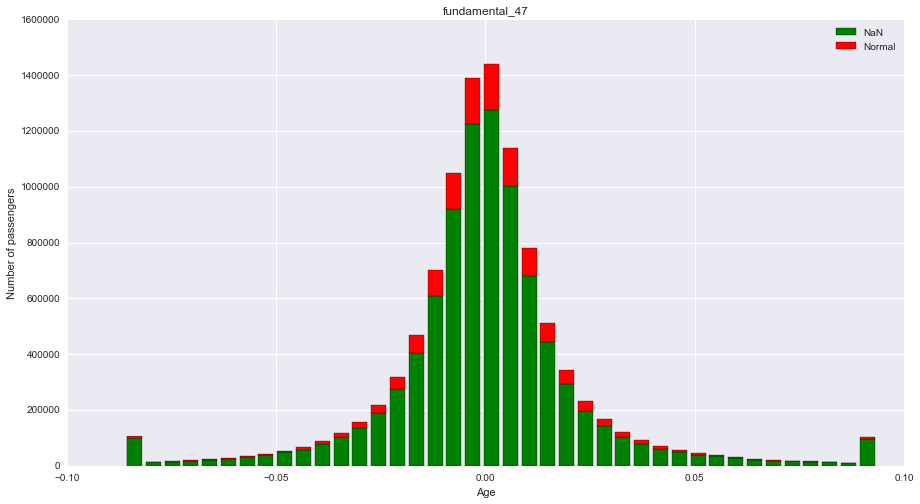

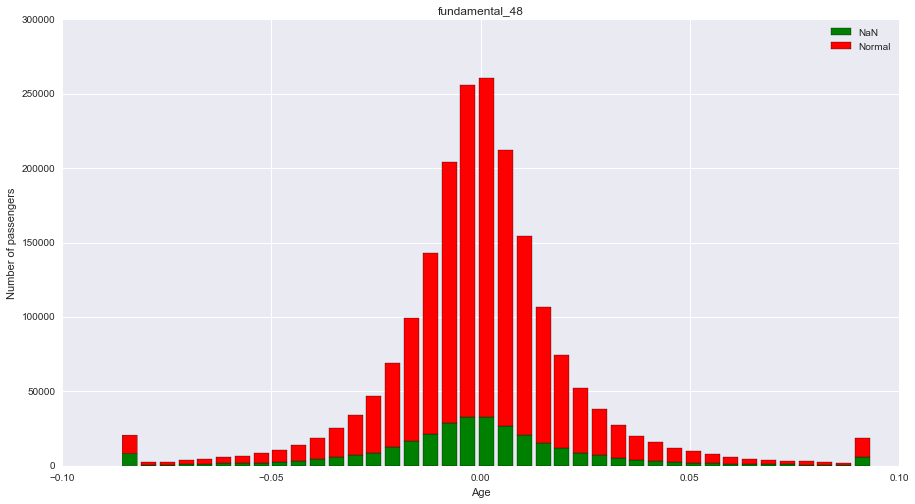

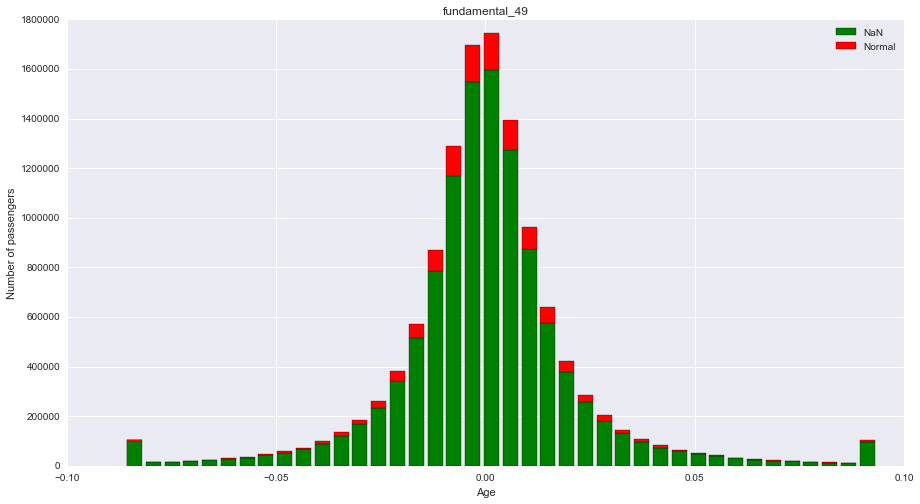

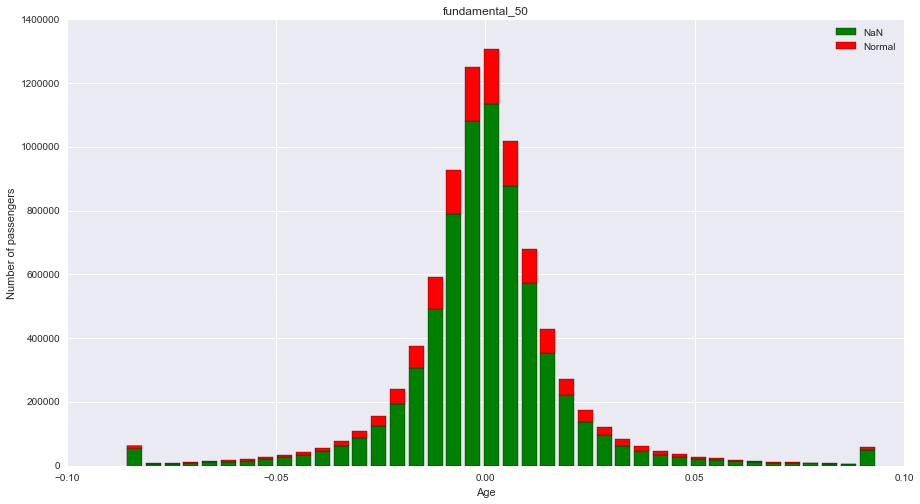

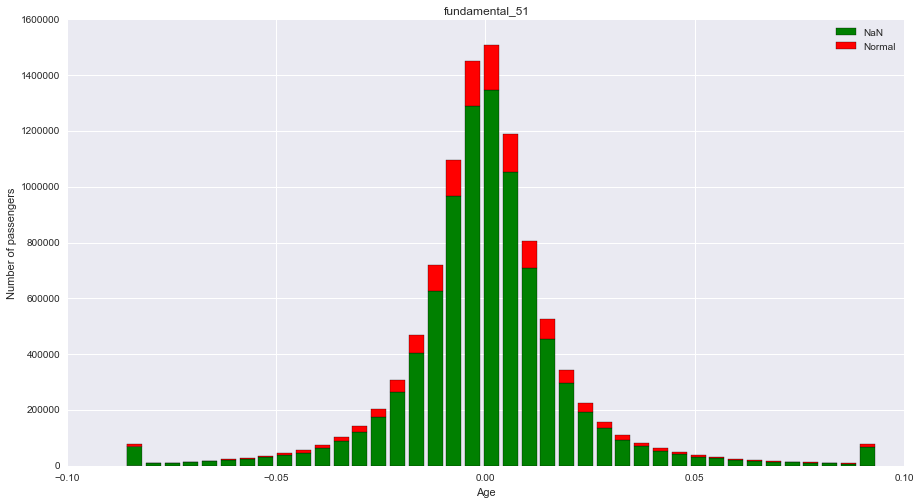

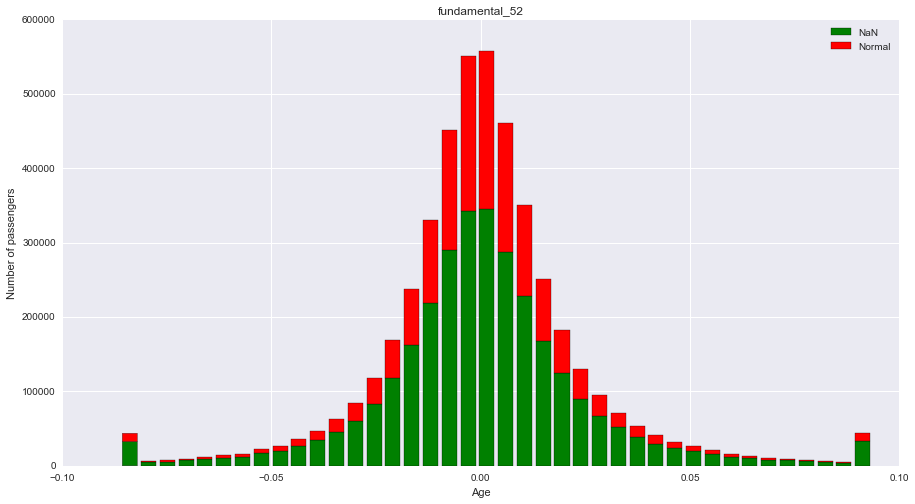

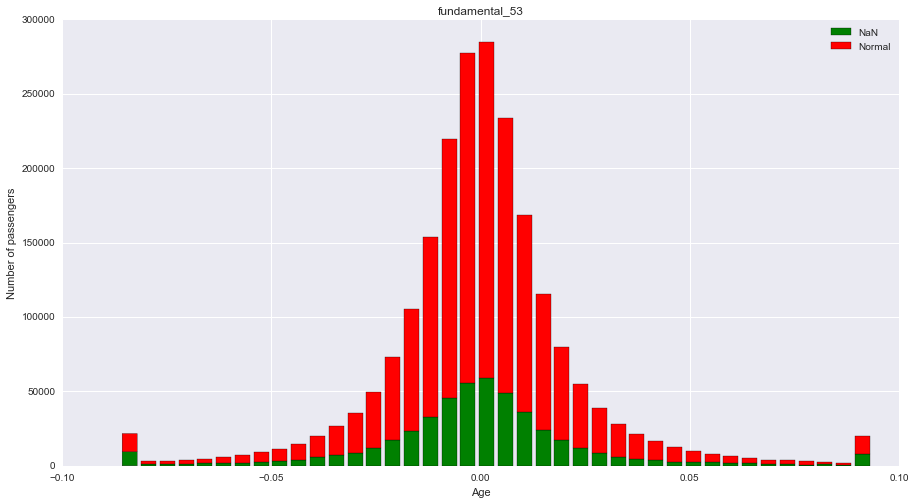

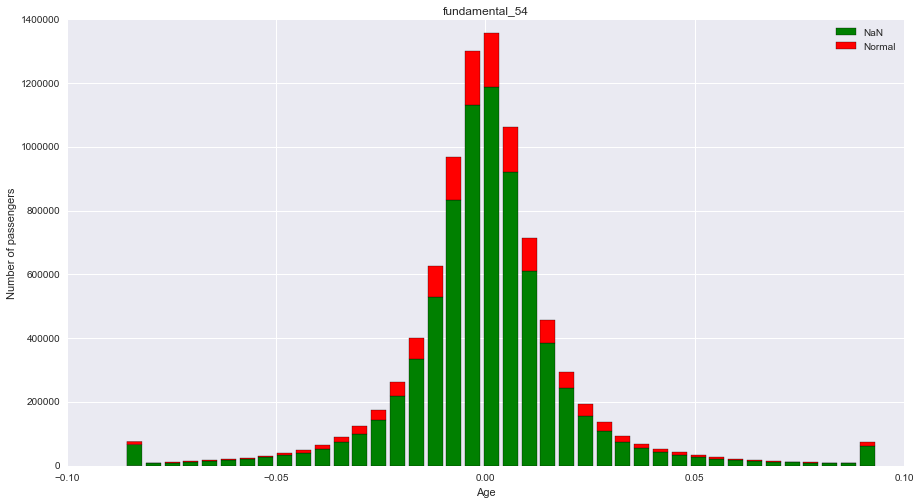

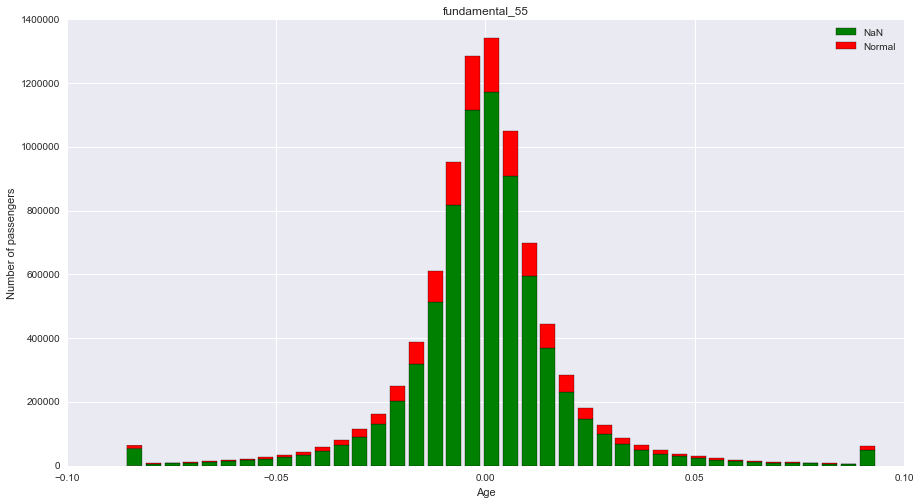

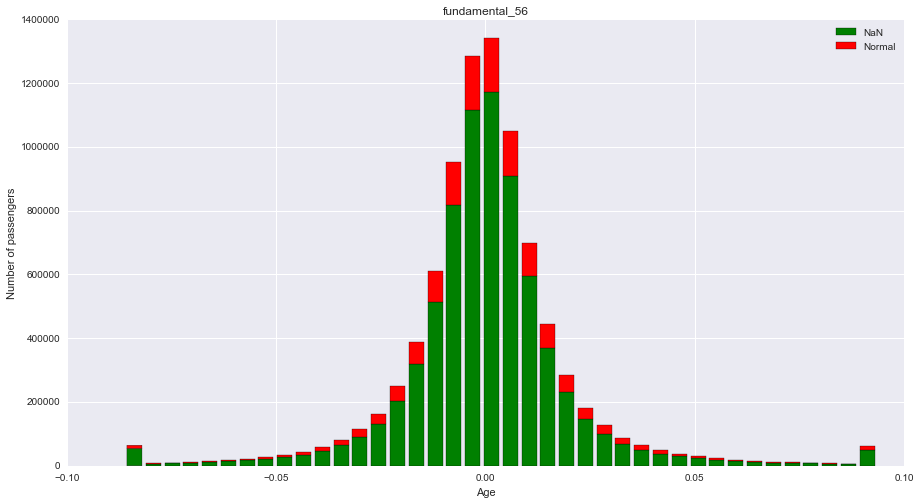

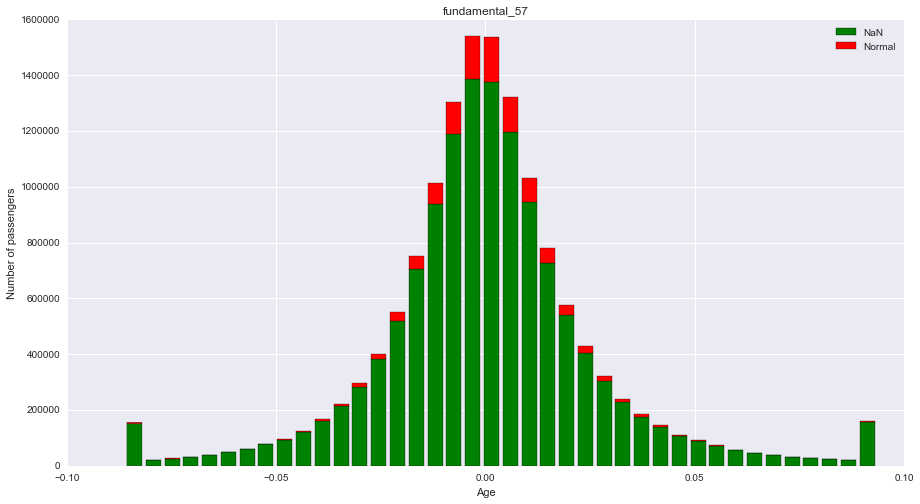

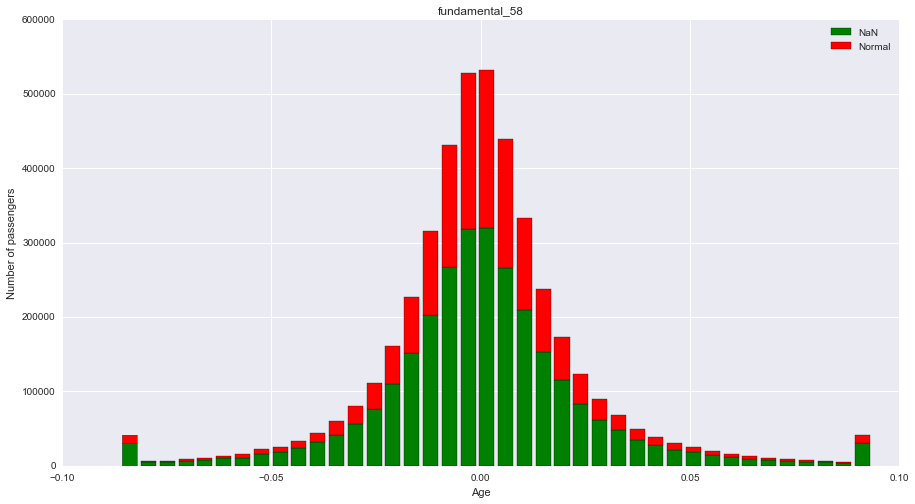

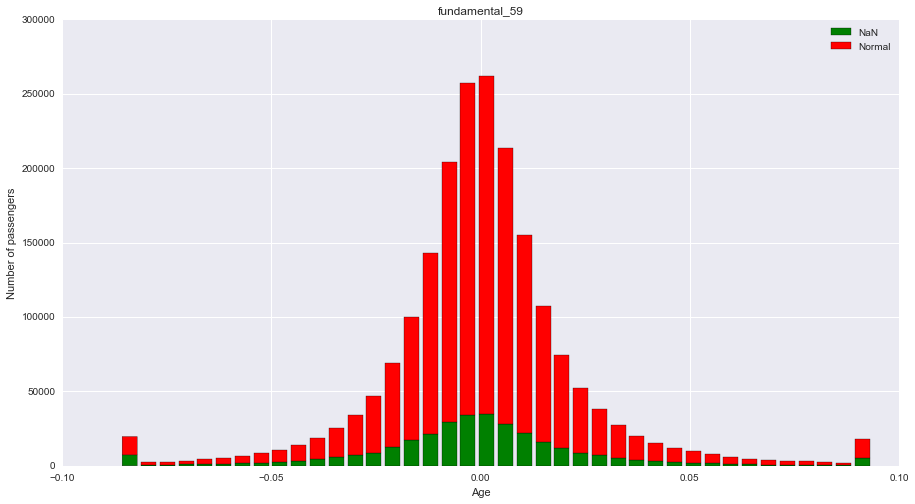

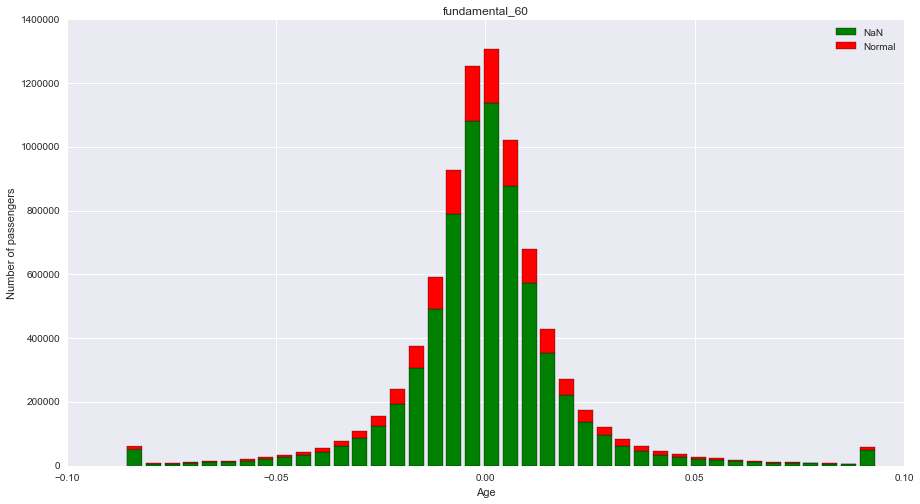

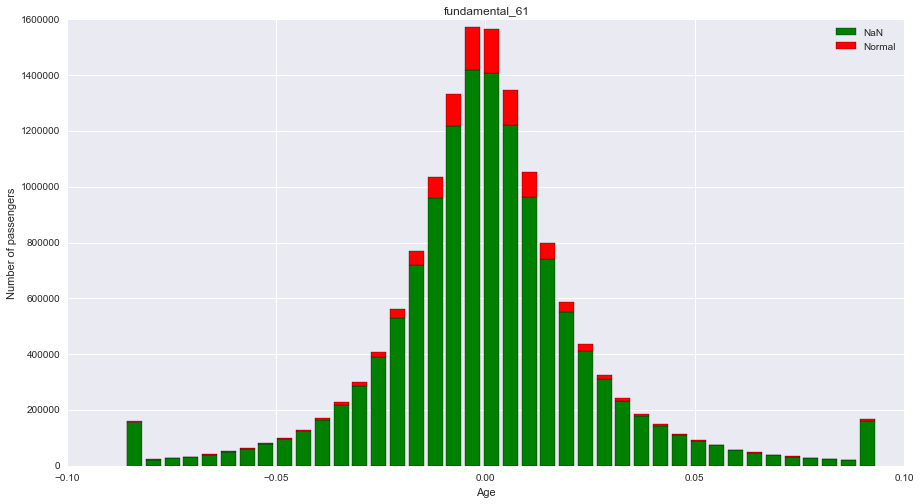

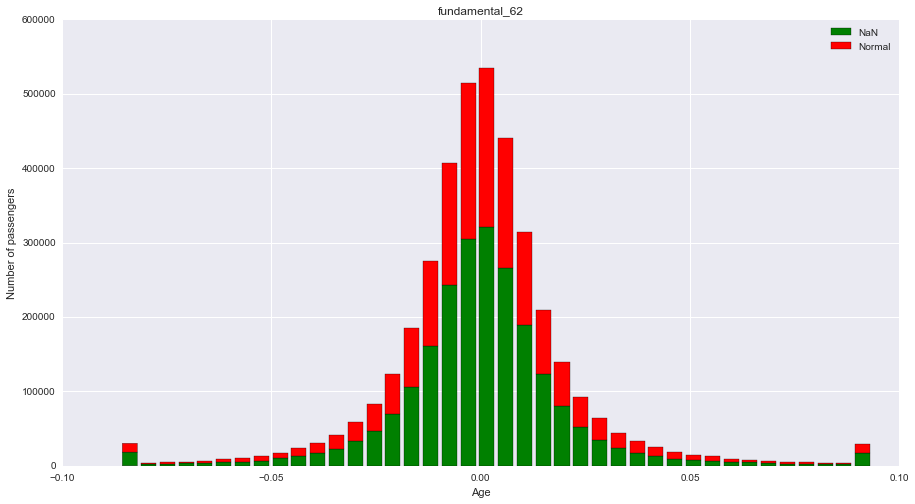

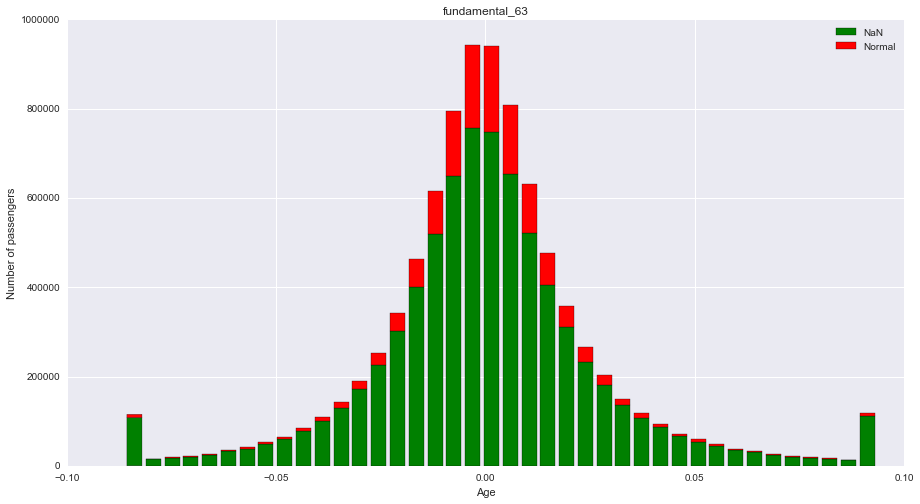

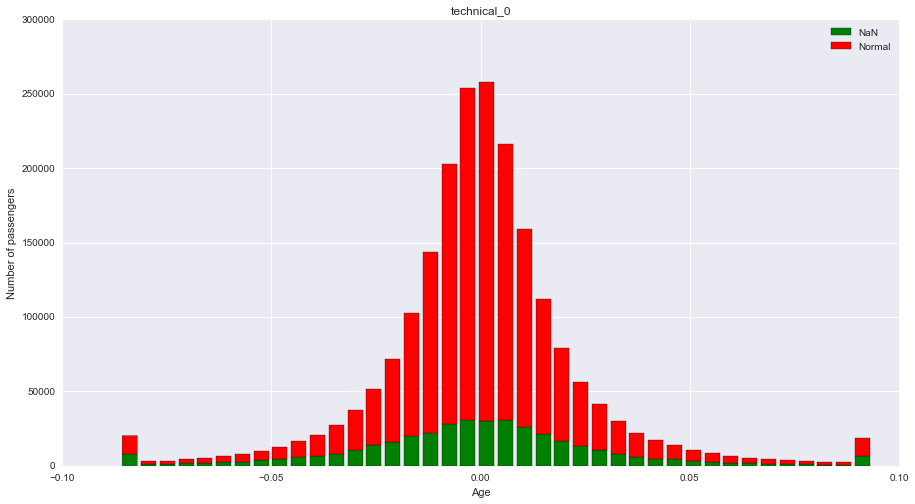

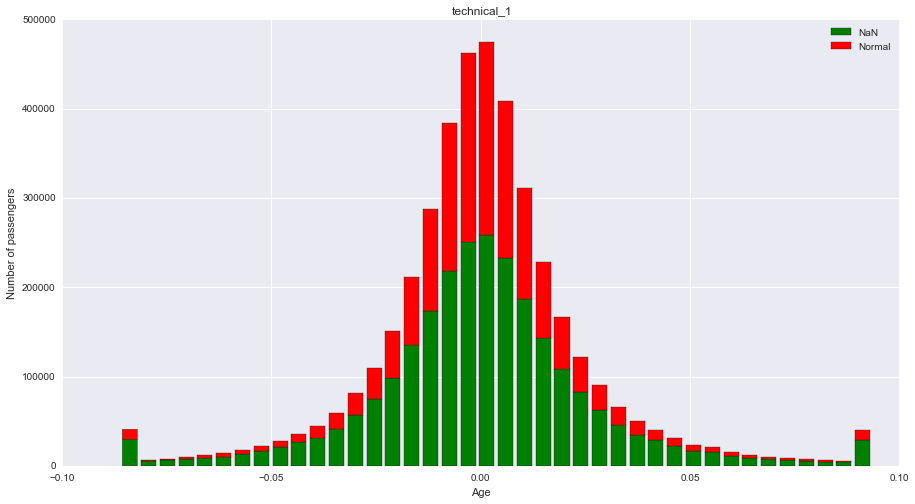

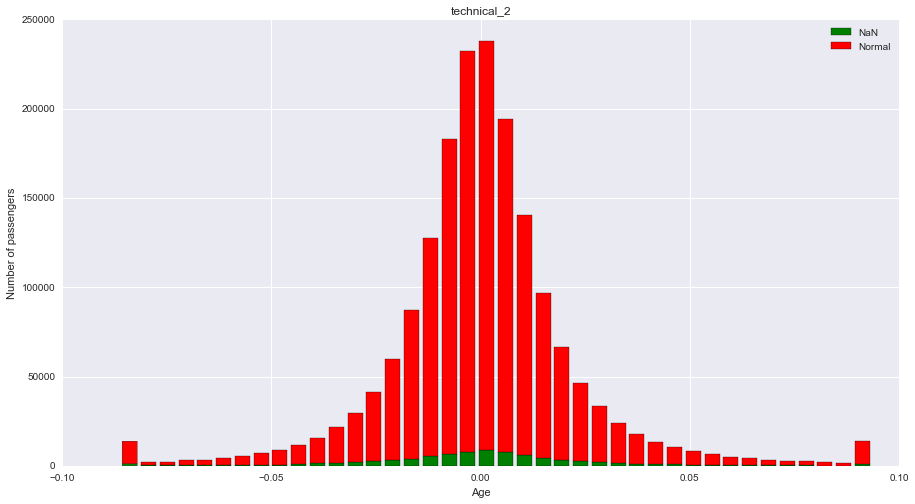

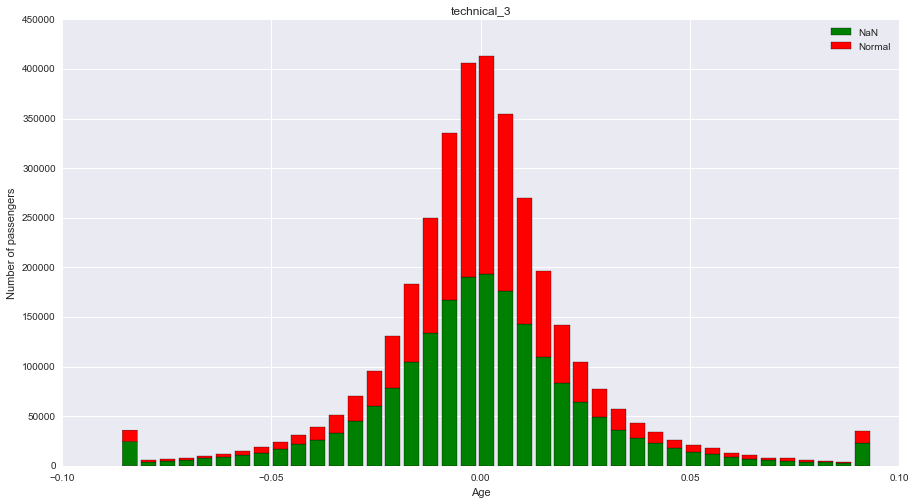

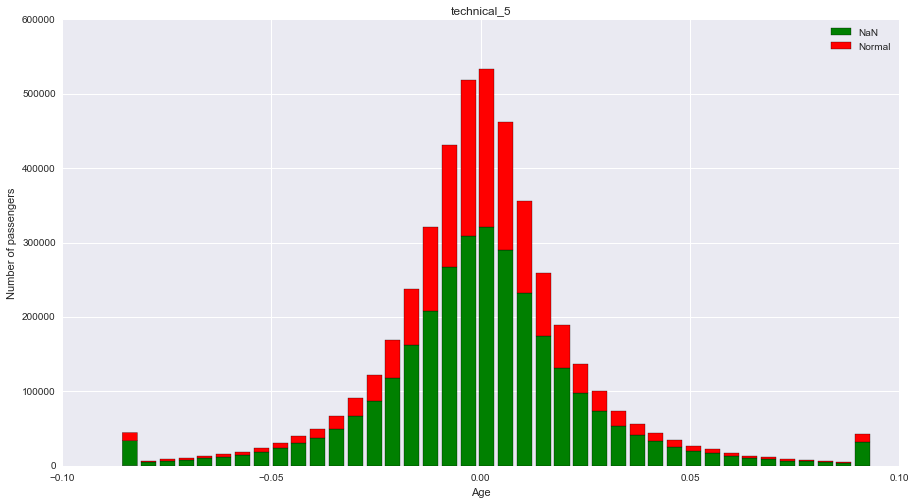

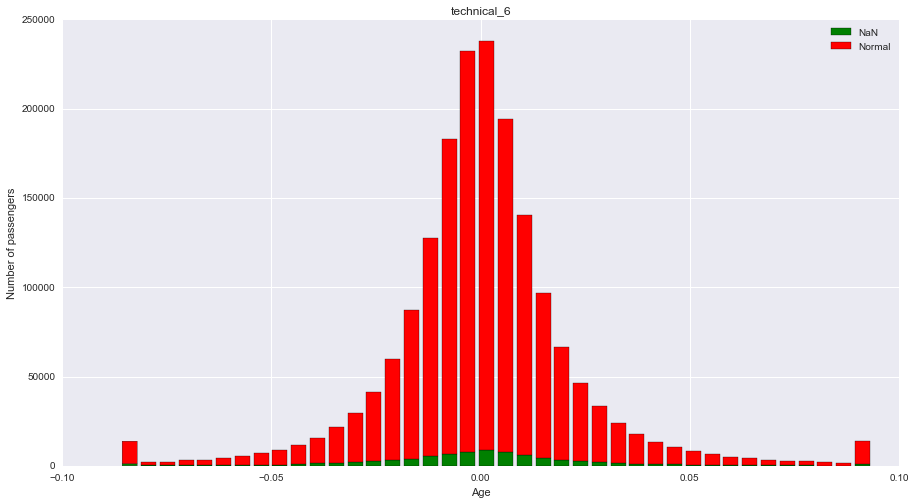

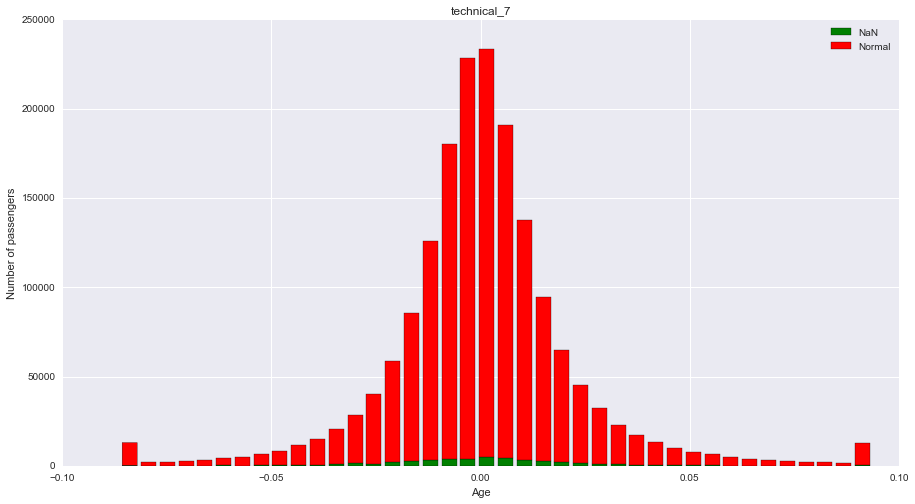

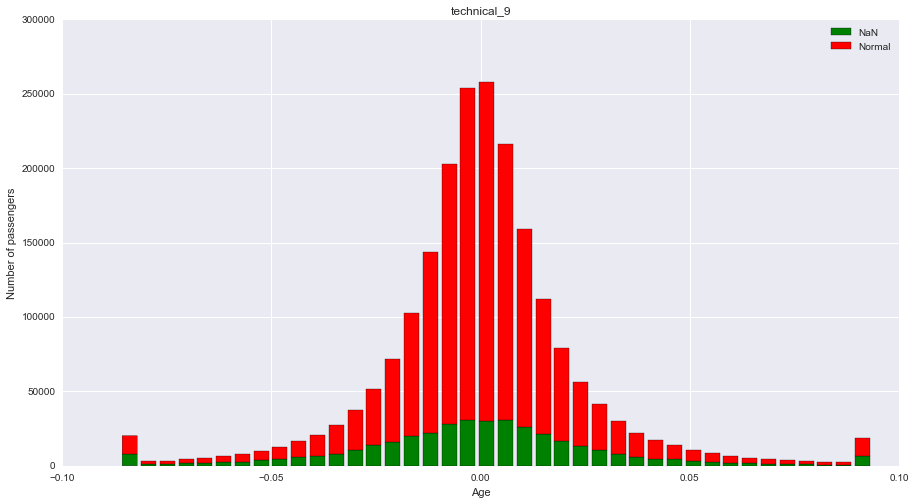

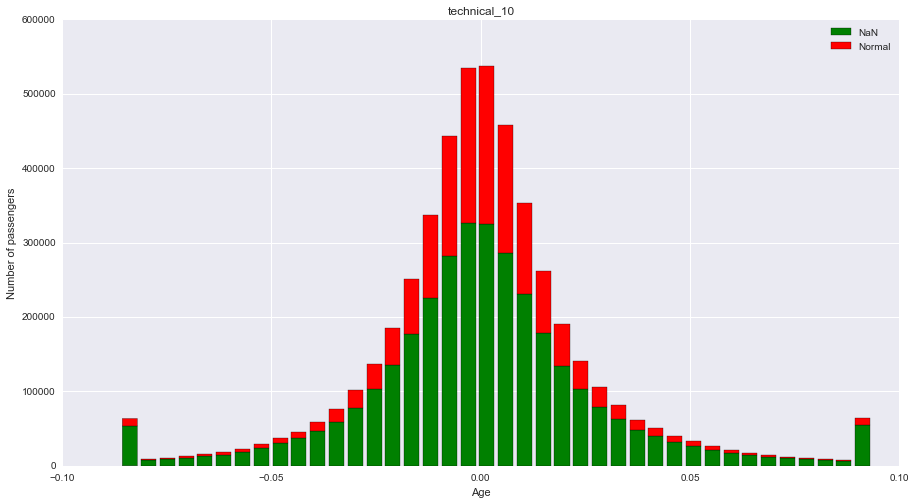

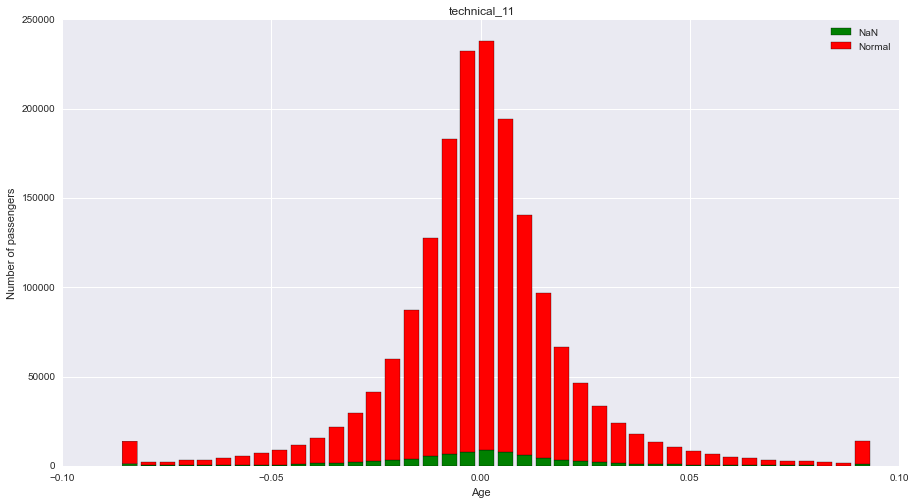

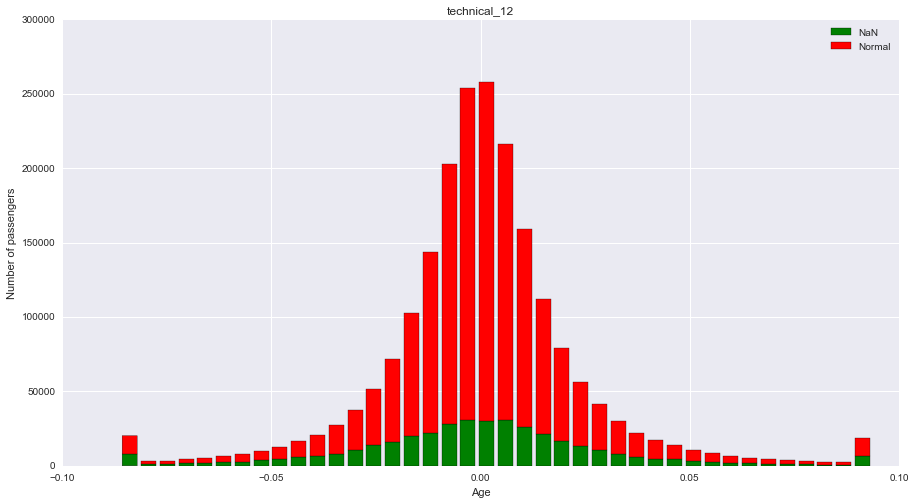

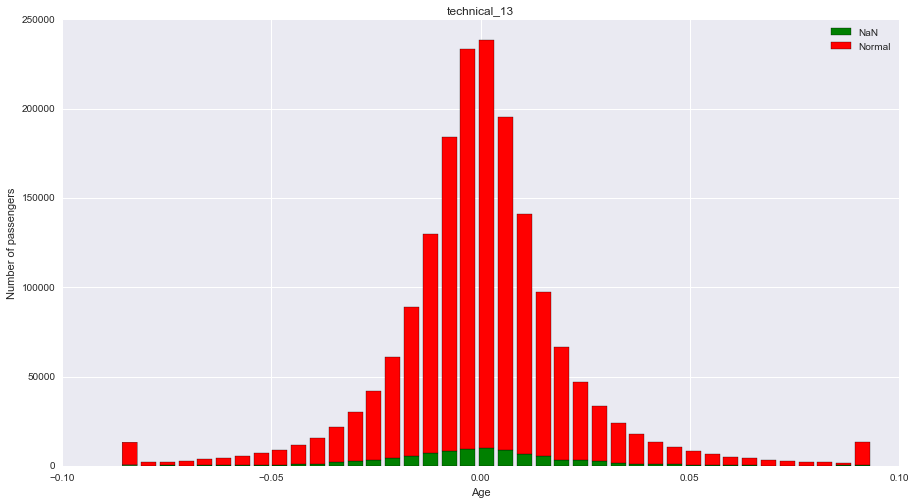

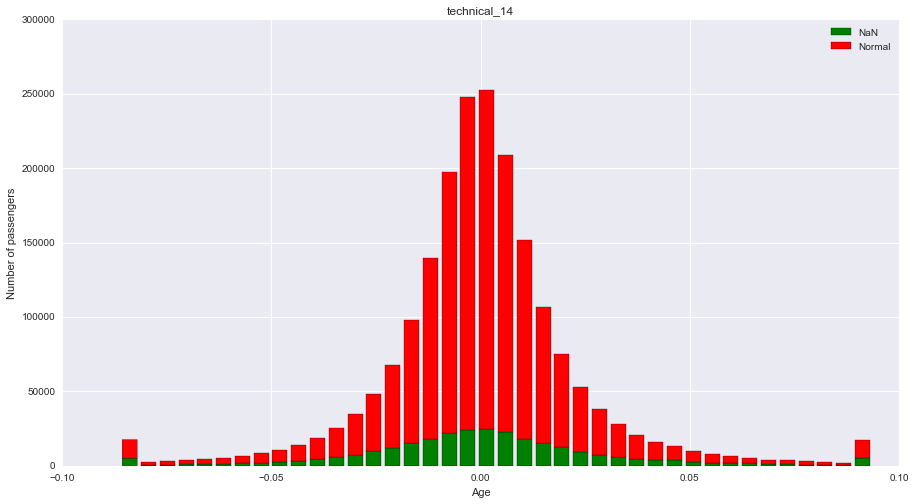

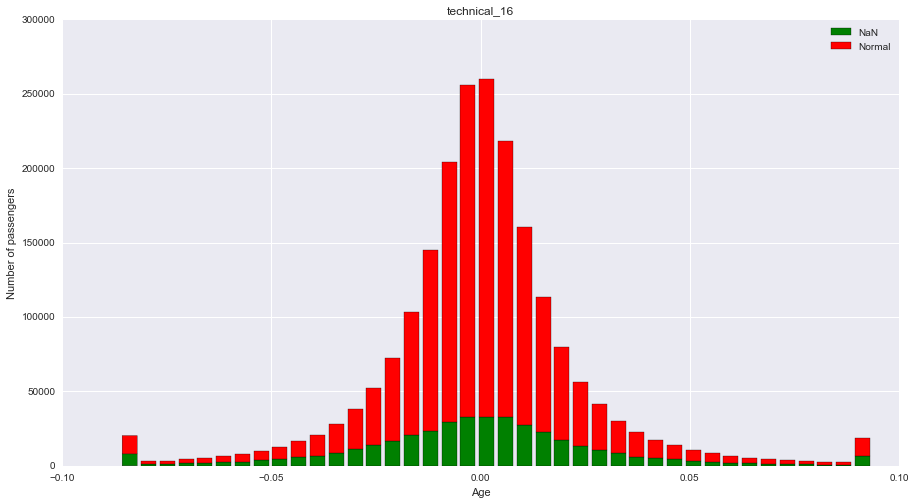

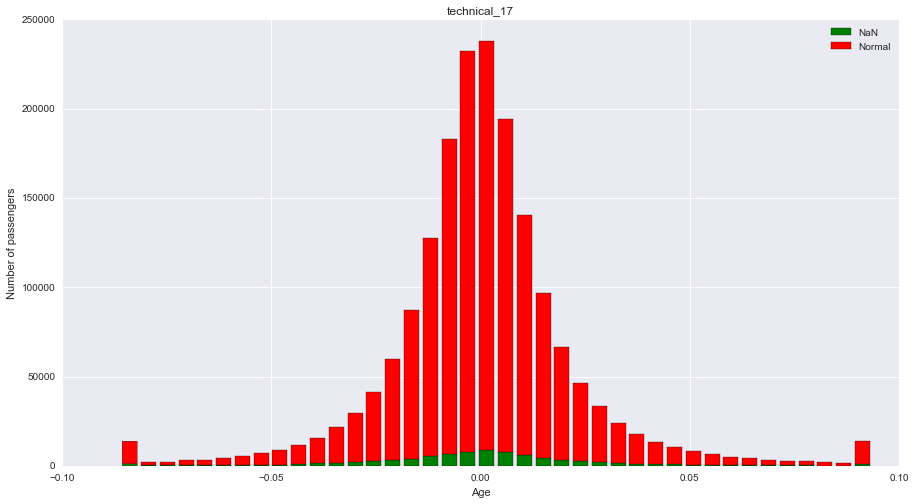

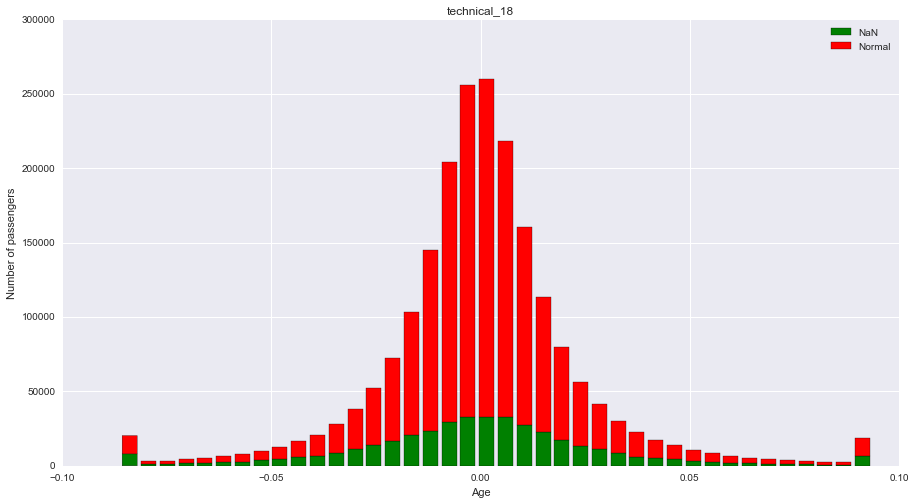

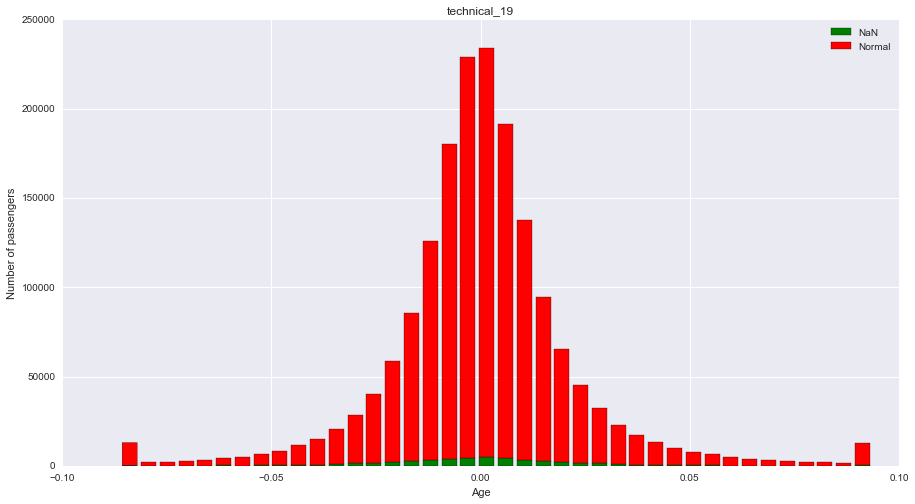

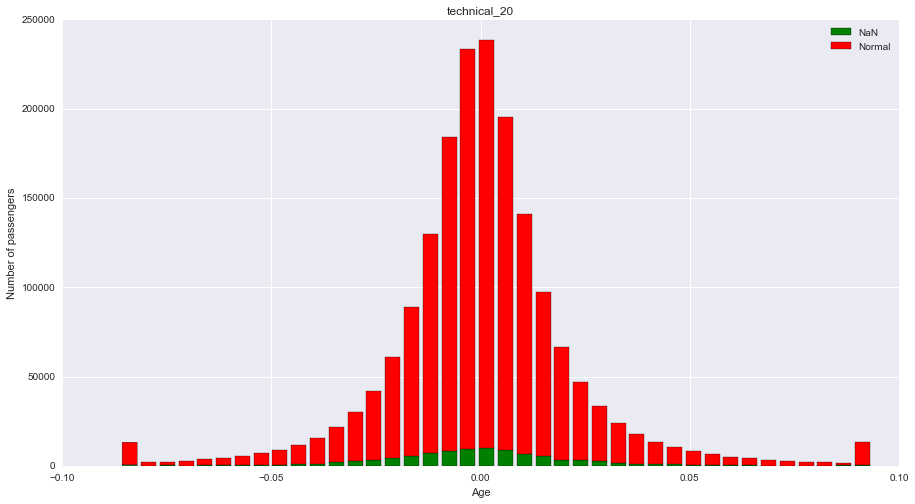

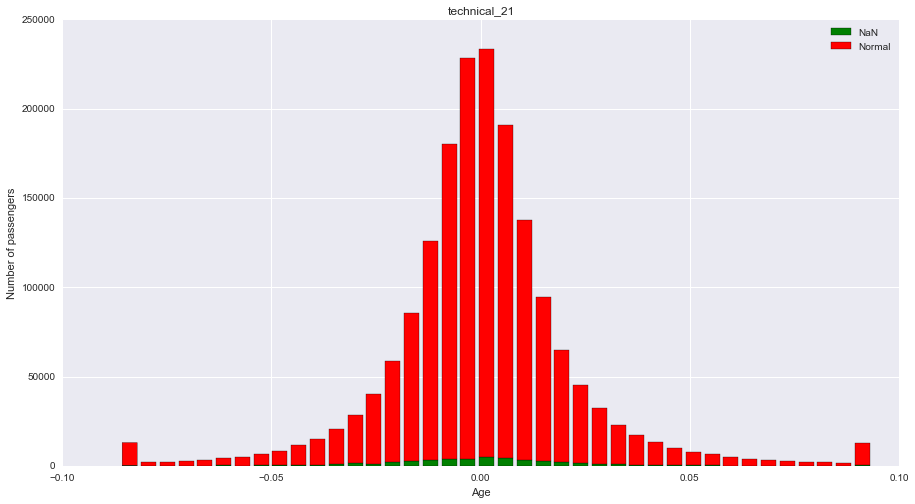

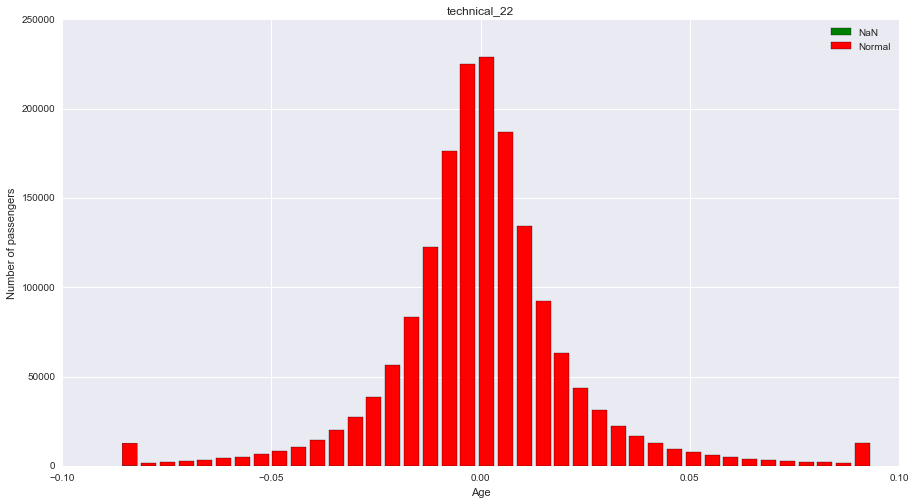

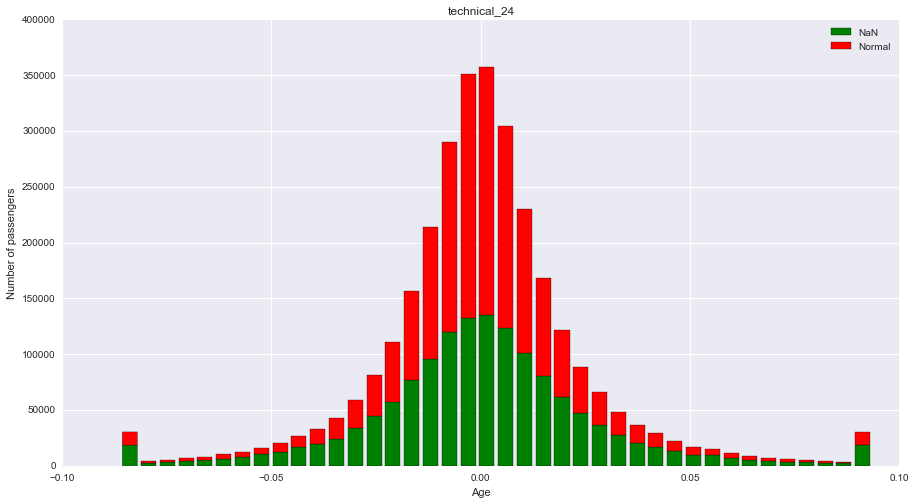

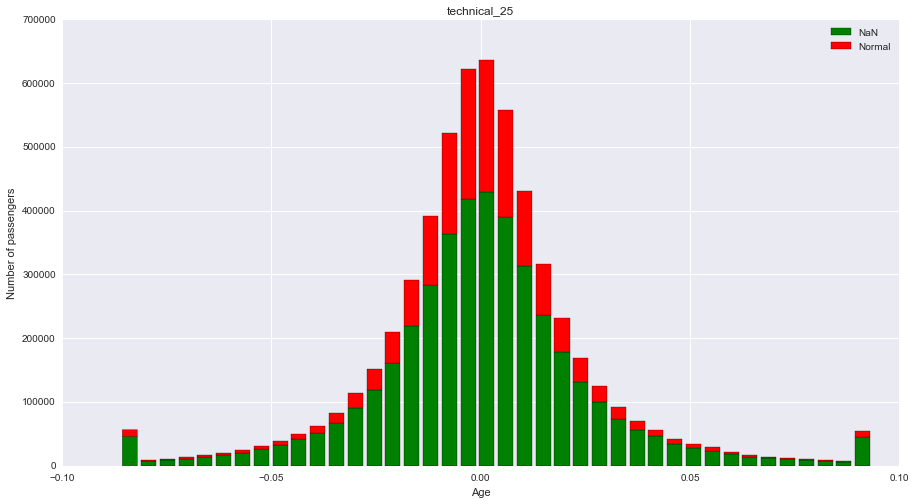

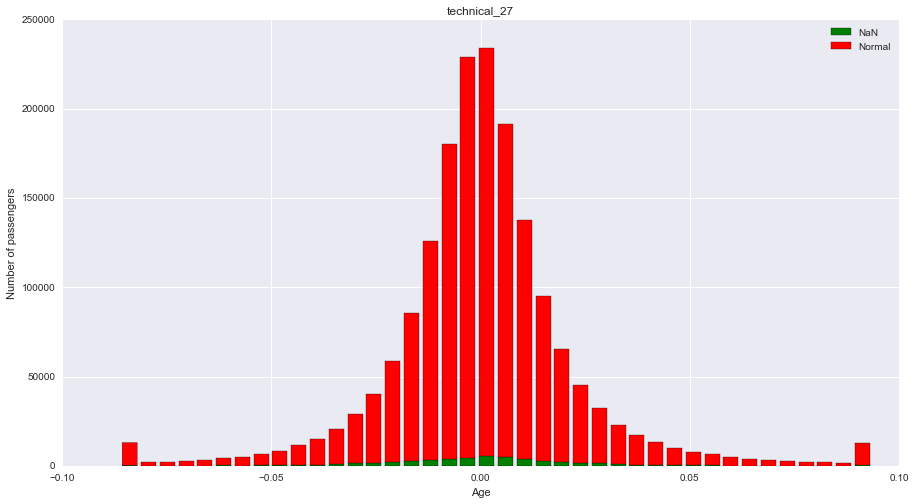

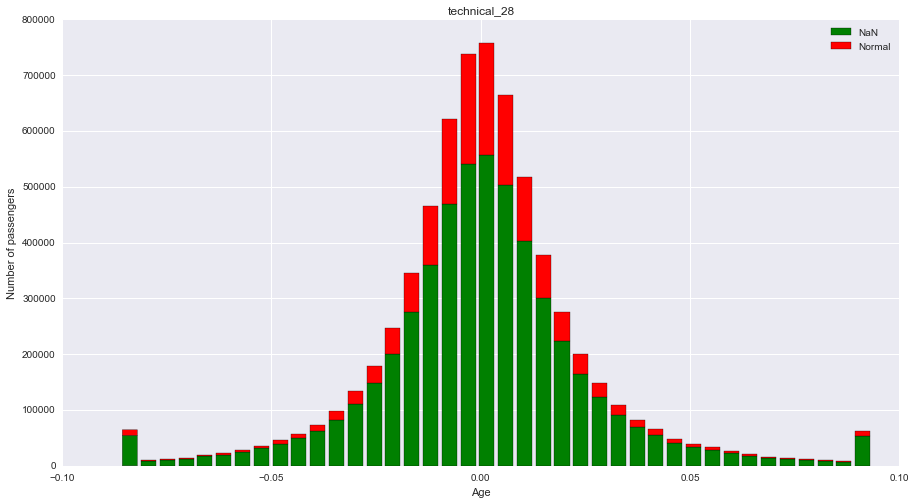

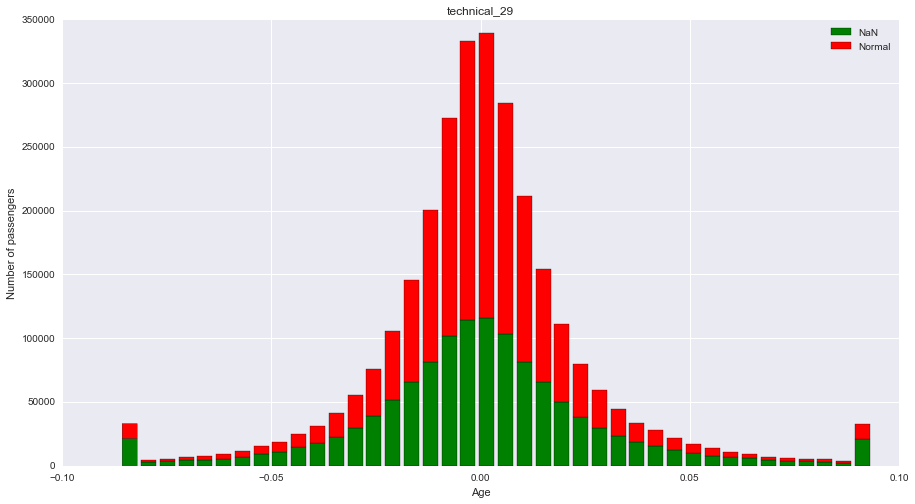

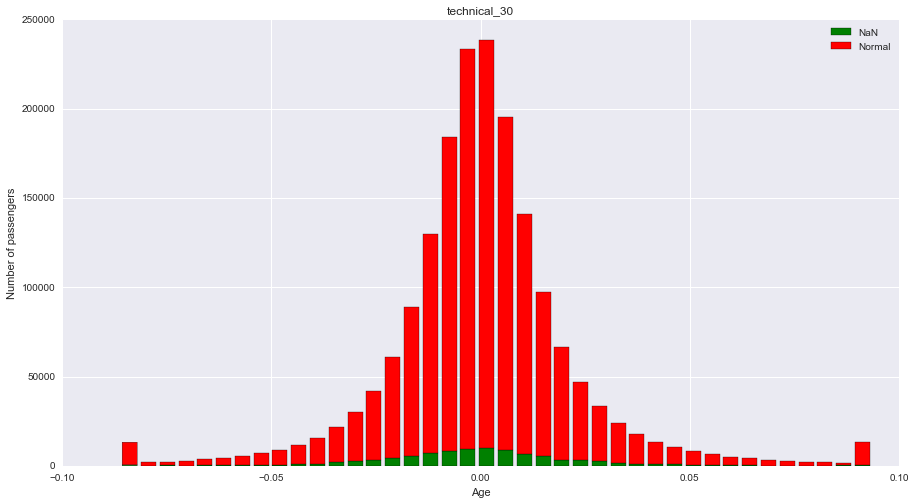

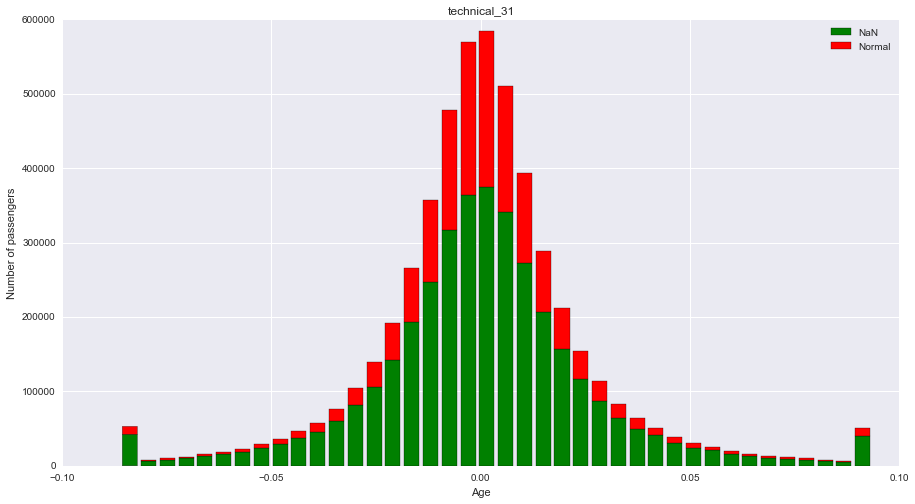

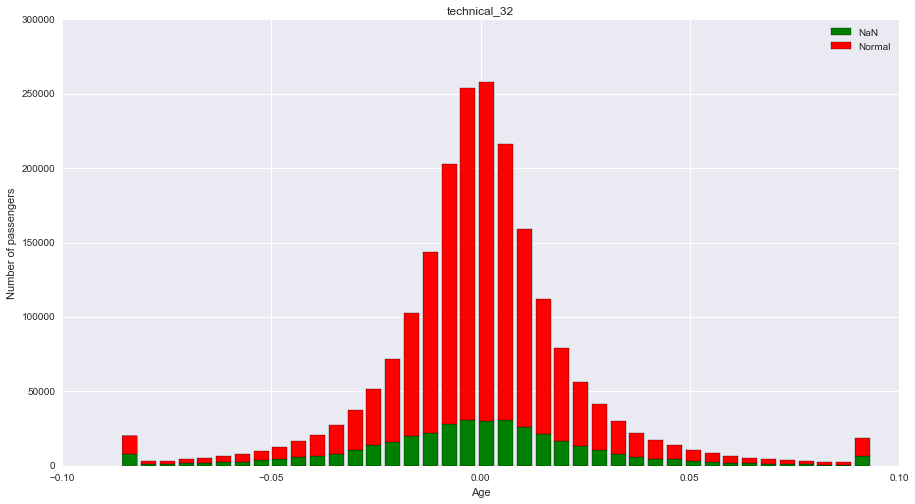

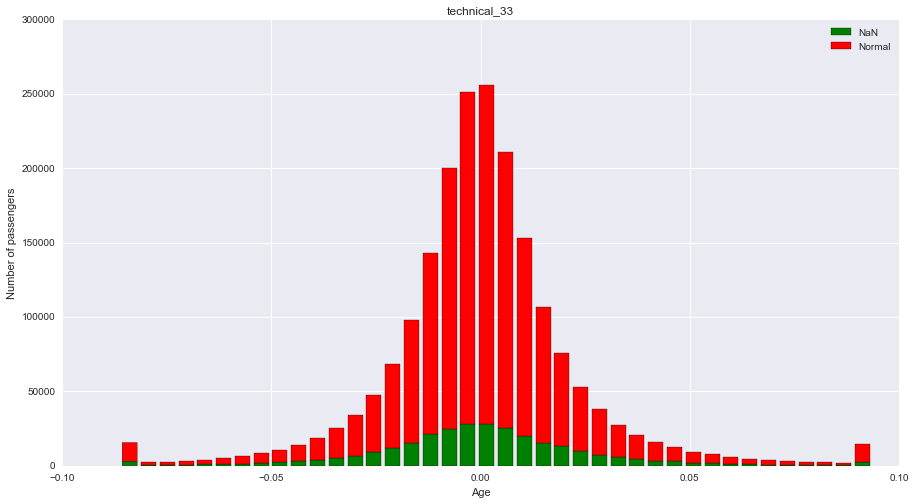

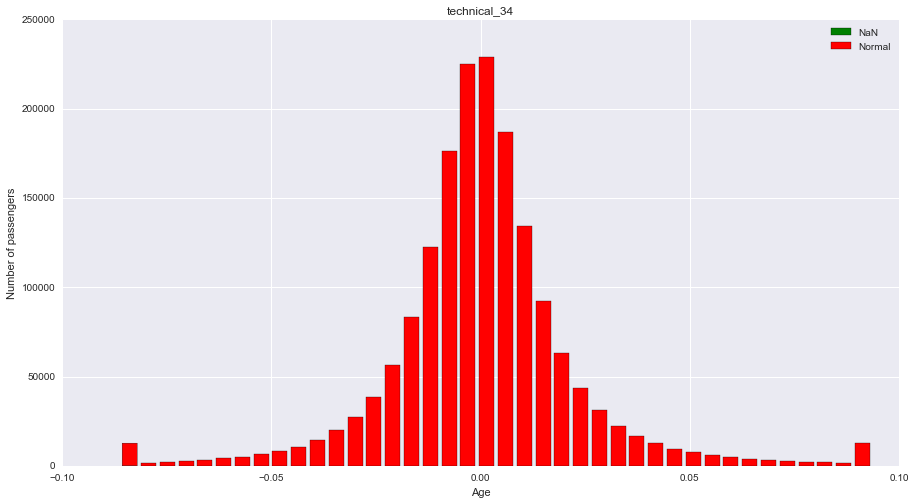

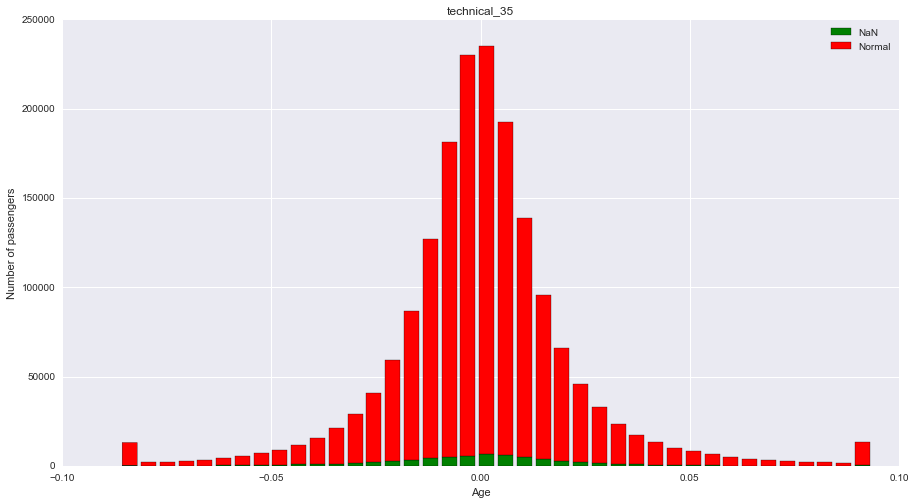

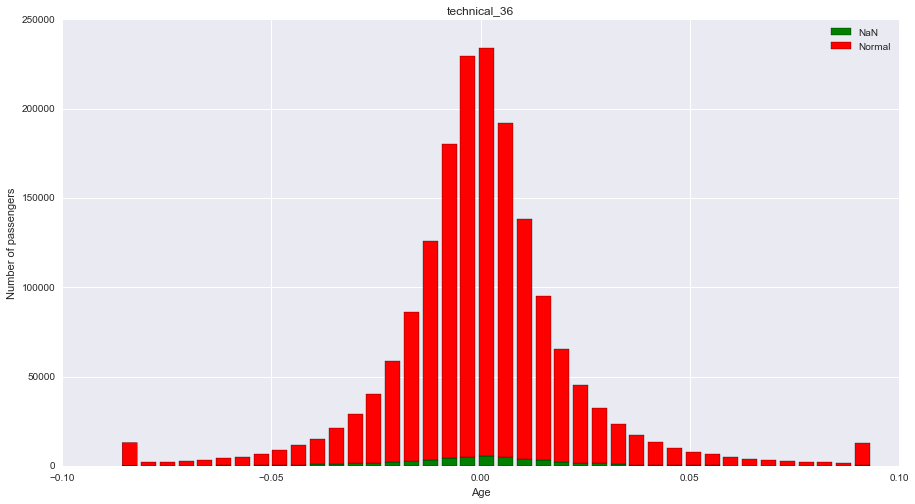

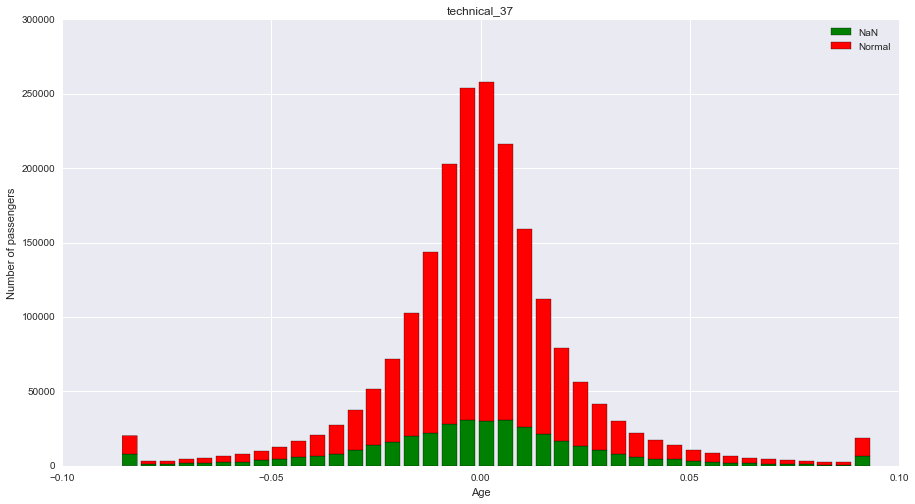

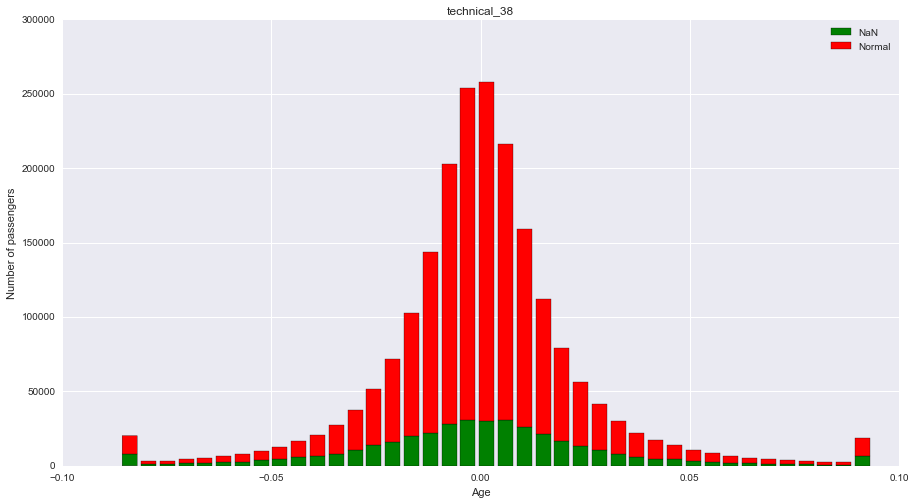

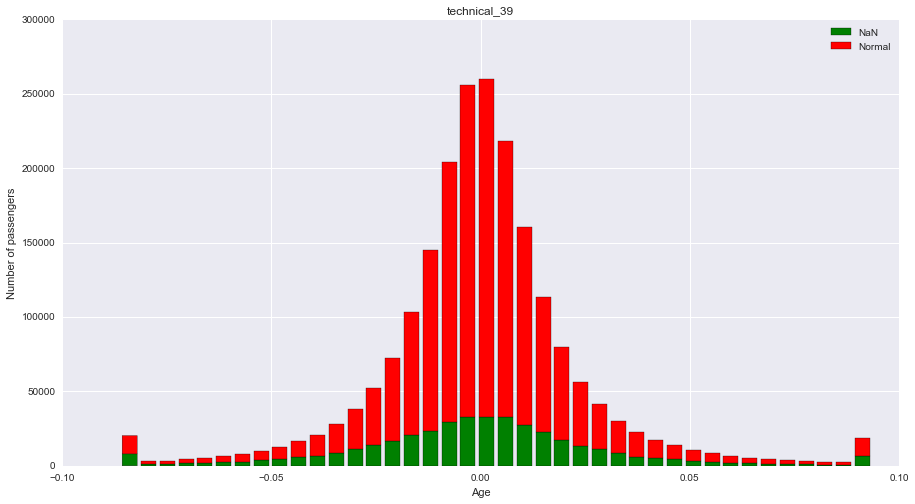

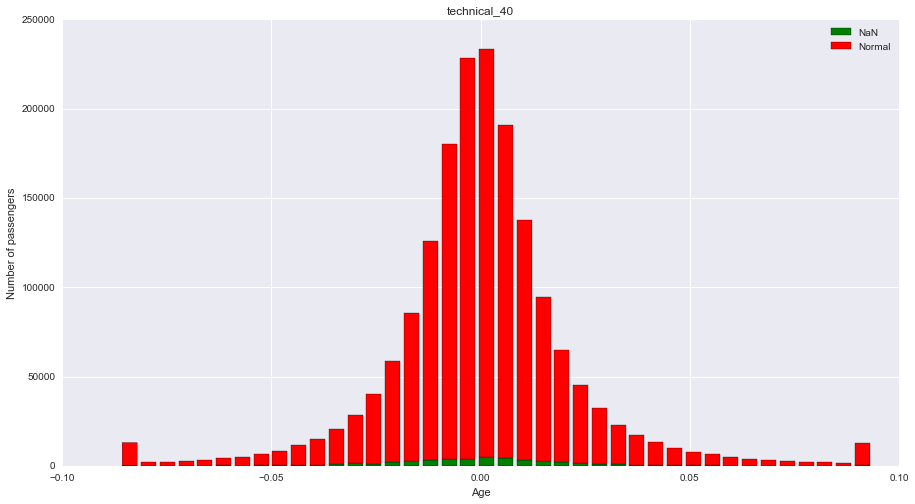

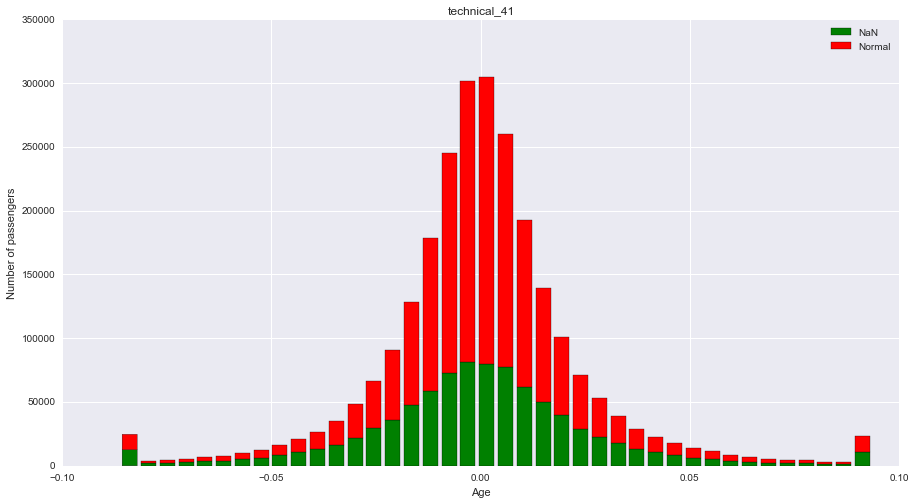

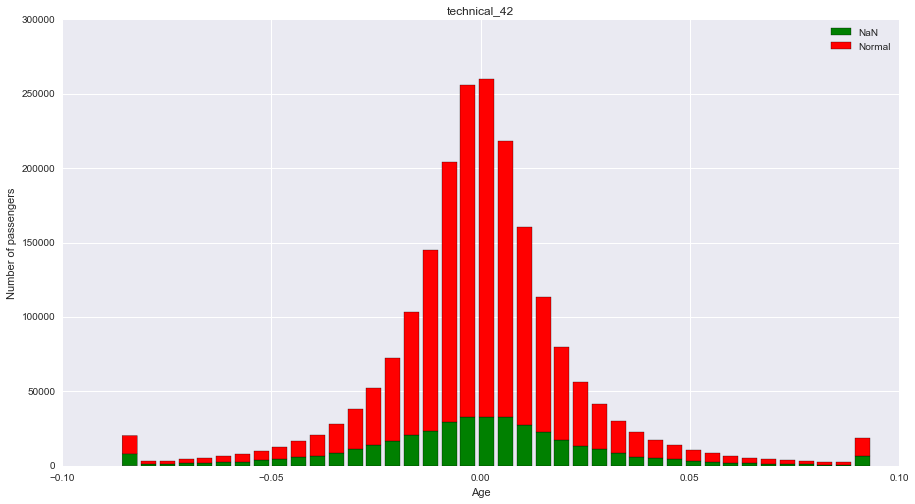

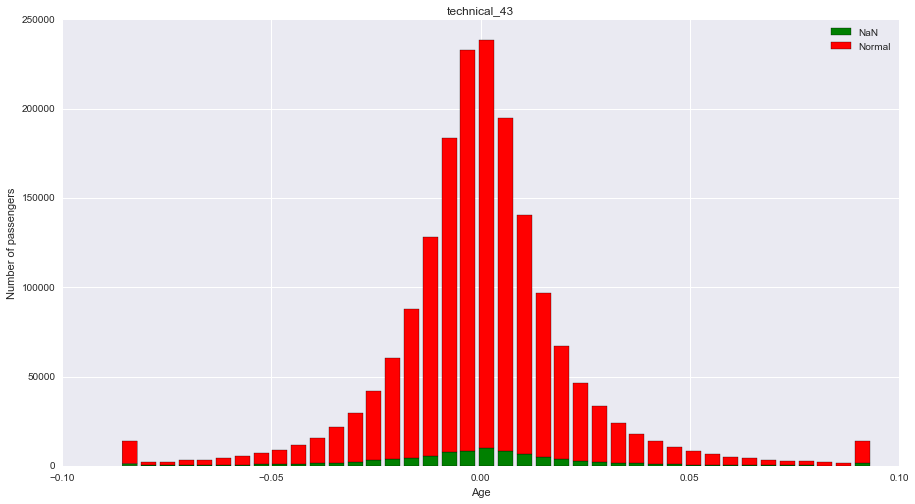

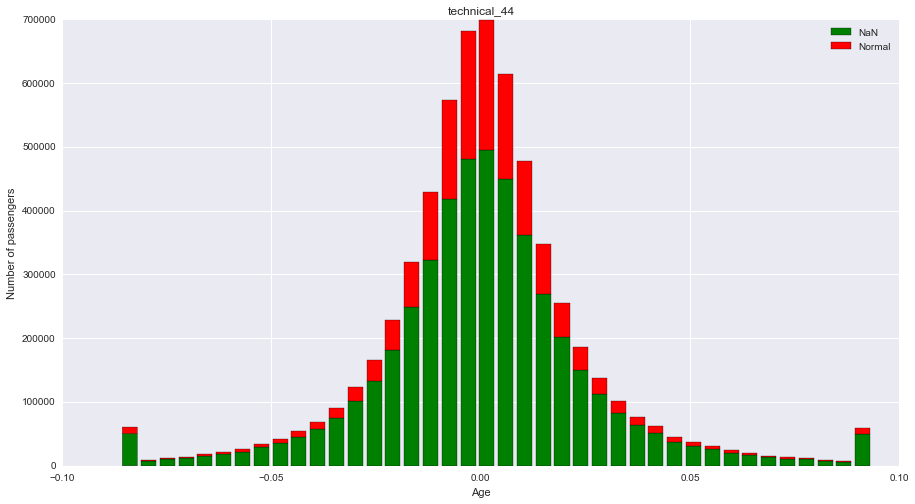

In [ ]:
for col in feature_cols:
    figure = plt.figure(figsize=(15,8))
    plt.title(col)
    nans = train.loc[train[col].isnull(), 'y']
    nans = pd.concat([nans]*20)
    plt.hist([nans, train.loc[~train[col].isnull(), 'y']], 
    stacked=True, color = ['g','r'],bins = 40,label = ['NaN','Normal'])
    plt.xlabel('Age')
    plt.ylabel('Number of passengers')
    plt.legend()
    plt.show()

In [56]:
for col in feature_cols:
    
    y_null = train.loc[train[col].isnull(), 'y']
    y_normal = train.loc[~train[col].isnull(), 'y']
    nan_mean = y_null.mean()
    normal_mean = y_normal.mean()
    nan_std = y_null.std()
    normal_std = y_normal.std()
    std_differ = (nan_std - normal_std) / normal_std
    if  -0.03 < std_differ < 0.03:
        print('-----\n' + col + ':')
        print( '<mean> NaN: ',nan_mean , ' Normal: ',normal_mean, 'differs: ', (nan_mean - normal_mean) / 0.2 * 100, '%')
        print( '<std> NaN: ',nan_std , ' Normal: ',normal_std, 'differs: ',  std_differ * 100, '%\n')
          

-----
derived_4:
<mean> NaN:  -2.52565e-05  Normal:  0.000298721 differs:  -0.161988849868 %
<std> NaN:  0.0223568  Normal:  0.0224413 differs:  -0.376598653384 %

-----
fundamental_22:
<mean> NaN:  8.87667e-05  Normal:  0.000286201 differs:  -0.0987172970781 %
<std> NaN:  0.0225351  Normal:  0.0223663 differs:  0.754709076136 %

-----
fundamental_35:
<mean> NaN:  -1.57554e-05  Normal:  0.000300124 differs:  -0.157939764904 %
<std> NaN:  0.0227198  Normal:  0.0223219 differs:  1.78228523582 %

-----
fundamental_49:
<mean> NaN:  8.81585e-05  Normal:  0.000286469 differs:  -0.0991554843495 %
<std> NaN:  0.0225251  Normal:  0.0223712 differs:  0.687768077478 %



In [11]:
train[7:10]

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
7,38,0,0.300062,0.071251,-0.074451,-0.065292,-0.011286,0.026365,0.210249,0.167494,...,0.242646,NaN,NaN,NaN,-0.168077,NaN,NaN,-2.0,NaN,0.015803
8,39,0,-0.003511,-0.034270,0.082372,-0.023937,-0.025750,0.007815,0.263451,-0.241212,...,0.186175,NaN,NaN,NaN,-0.300842,NaN,NaN,-2.0,NaN,-0.027593
9,40,0,-0.083330,0.081935,-2.048438,-0.206856,-0.839563,-0.234100,-0.291853,-5.722336,...,-0.021965,NaN,NaN,NaN,-0.386579,NaN,NaN,-2.0,NaN,0.006662


# timestamp  

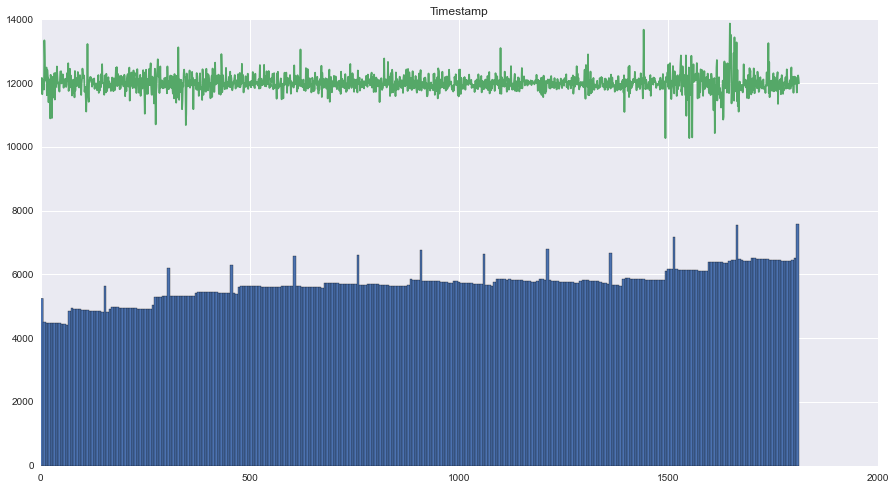

In [53]:
fig = plt.figure(figsize=(15, 8))
plt.hist(train.timestamp, bins=300)
plt.plot(train[train['id']==41]['timestamp'], train[train['id']==41]['y']* 19999 + 12000)
plt.title('Timestamp')

## focus on 0~500 

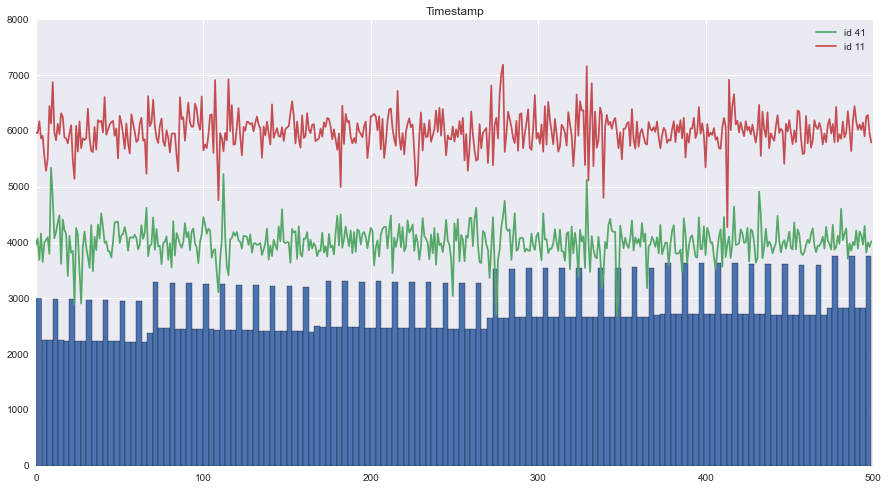

In [60]:
fig = plt.figure(figsize=(15, 8))
plt.hist(train.timestamp.loc[train.timestamp < 500], bins=150)
plt.plot(train[train['id']==41]['timestamp'].loc[train.timestamp < 500], train[train['id']==41]['y'].loc[train.timestamp < 500]* 19999 + 4000, label='id 41')
plt.plot(train[train['id']==11]['timestamp'].loc[train.timestamp < 500], train[train['id']==11]['y'].loc[train.timestamp < 500]* 19999 + 6000, label='id 11')
plt.title('Timestamp')
plt.legend()

In [8]:
data = train.loc[y_within, 'technical_20']

In [10]:
data.shape

(1676587,)

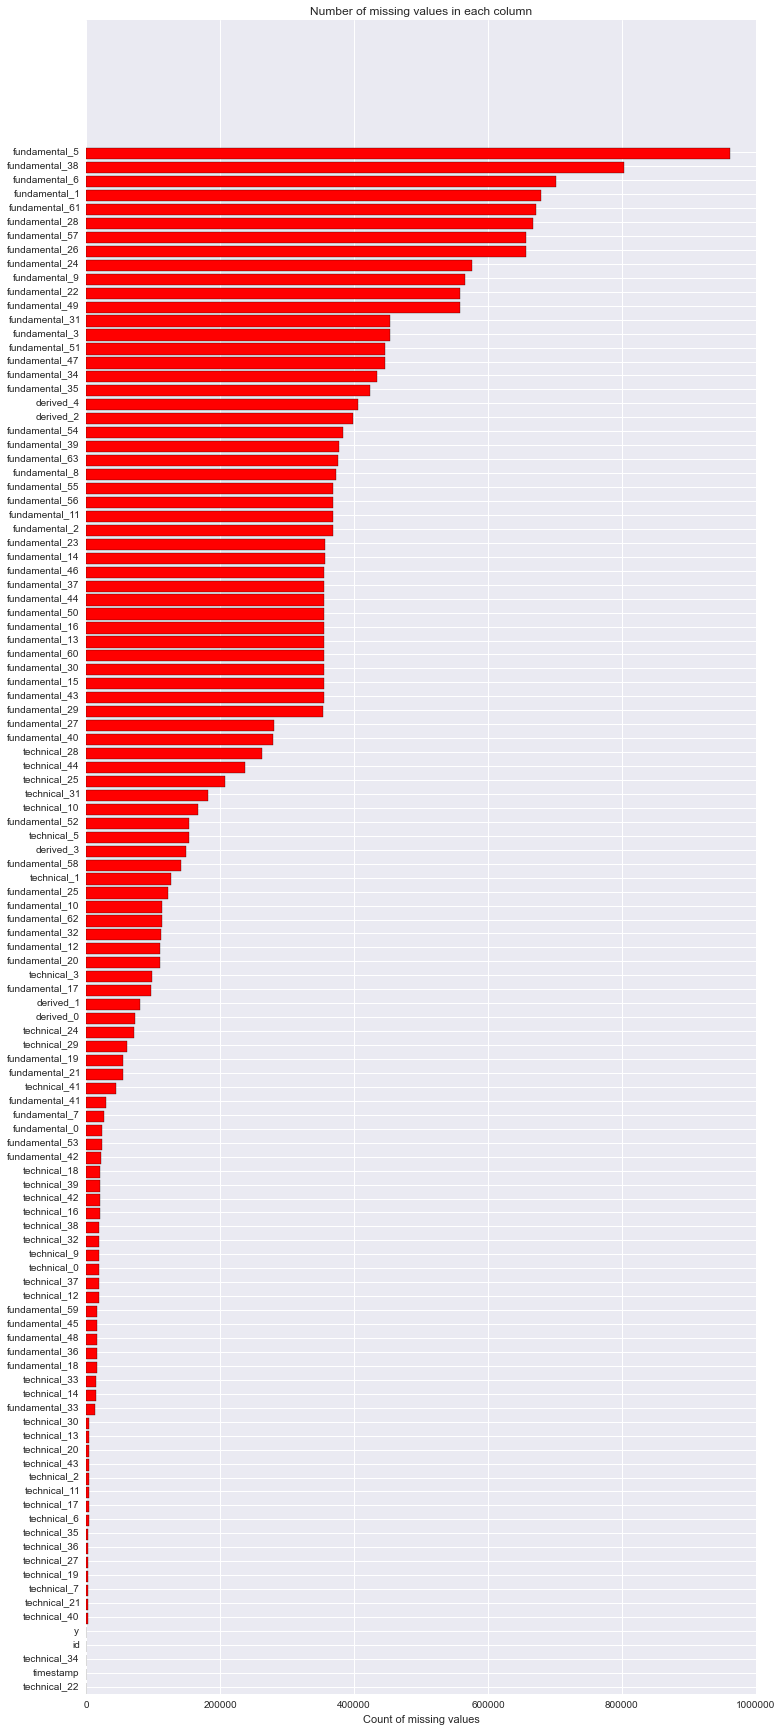

In [8]:
ind = np.arange(len(null_counts))
width = 1.0
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, np.array([item[1] for item in null_counts_sorted]), color='r')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels([item[0] for item in null_counts_sorted], rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()

# How features affects each other?

In [4]:
correlations = np.zeros((len(feature_cols), len(feature_cols)))

In [ ]:
for i, col_base in enumerate(feature_cols):
    print('process feature ', i, feature_cols[i])
    for j, col in enumerate(feature_cols[i : ]):
        clean_data = train[[col, col_base]]
        clean_data.dropna(how='any', axis='index', inplace=True)
        correlations[i, j + i] = np.corrcoef(clean_data[col].values, clean_data[col_base].values)[0,1]

process feature  0 derived_0


/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
sorted_correlations

[('derived_4', -0.96217164179314407),
 ('fundamental_9', -0.030520053507916933),
 ('technical_22', -0.024159071700412076),
 ('technical_7', -0.02298028377774388),
 ('fundamental_47', 0.021108126055908012),
 ('technical_5', -0.019979578446385909),
 ('fundamental_60', -0.01911654782264928),
 ('fundamental_11', 0.018678455586420749),
 ('technical_29', 0.018466965473468454),
 ('technical_34', 0.014671584938277424),
 ('fundamental_24', 0.014093678009688046),
 ('fundamental_0', 0.013533687103182389),
 ('fundamental_59', -0.013433745949836927),
 ('fundamental_30', -0.013431319435806431),
 ('fundamental_21', -0.013036600847537149),
 ('fundamental_55', 0.012508336209253299),
 ('technical_20', -0.012344616447584734),
 ('technical_44', 0.012141388406974495),
 ('technical_28', 0.01210838065758457),
 ('fundamental_54', -0.01175046095310061),
 ('technical_14', 0.011232359249292076),
 ('fundamental_2', 0.010259340186072866),
 ('fundamental_58', 0.0099605331287585183),
 ('technical_31', -0.00983515462

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


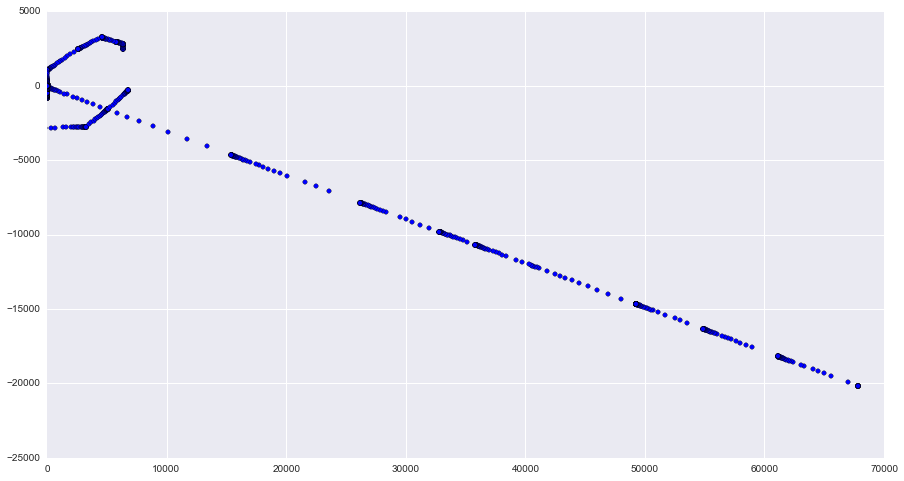

In [89]:
plt.figure(figsize=(15, 8))
clean_data = train[['derived_4', feature_cols[0]]]
clean_data.dropna(how='any', axis='index', inplace=True)
plt.scatter(clean_data.derived_4, clean_data[feature_cols[0]])
plt.xlim(10, 70000)
# plt.ylim(-10, 10)
plt.show()

# Filling NaN 

In [9]:
mean_values = train.mean(axis=0)
train.fillna(mean_values, inplace=True)
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-6.316399e-03,0.222831,-0.213030,0.729277,-0.335633,1.132921e-01,1.621238,...,0.775208,-0.091085,-0.08161,-0.072901,-0.414776,0.005236,-0.017001,-2.0,0.000388,-0.011753
1,11,0,0.014765,-3.806422e-02,-0.017425,0.320652,-0.034134,0.004413,1.142851e-01,-0.210185,...,0.025590,-0.091085,-0.08161,-0.072901,-0.273607,0.005236,-0.017001,-2.0,0.000388,-0.001240
2,12,0,-0.010622,-5.057707e-02,3.379575,-0.157525,-0.068550,-0.155937,1.219439e+00,-0.764516,...,0.151881,-0.091085,-0.08161,-0.072901,-0.175710,0.005236,-0.017001,-2.0,0.000388,-0.020940
3,25,0,-4.537569,7.729437e+11,-0.332129,-0.504715,18.032330,0.178495,-5.703752e+08,-0.007262,...,1.035936,-0.091085,-0.08161,-0.072901,-0.211506,0.005236,-0.017001,-2.0,0.000388,-0.015959
4,26,0,0.176693,-2.528418e-02,-0.057680,0.015100,0.180894,0.139445,-1.256869e-01,-0.018707,...,0.630232,-0.091085,-0.08161,-0.072901,-0.001957,0.005236,-0.017001,0.0,0.000388,-0.007338


# Correlation coefficient plot:

Let us look at the correlation of each of the variables with the target variables to get some important variables to be used for our next steps.

In [10]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train.columns if col not in ['id','timestamp','y']]

correlations = {}
for col in x_cols:
    correlations[col] = np.corrcoef(train[col].values, train.y.values)[0,1]
    

In [11]:
sorted_correlations = sorted(correlations.items(), key=lambda x : np.abs(x[1]), reverse=True)

In [12]:
sorted_correlations

[('technical_20', -0.01650706213744442),
 ('technical_30', 0.014248127626105974),
 ('technical_27', -0.0080853895524152786),
 ('technical_19', -0.0076405901863852207),
 ('fundamental_11', 0.0073812177682003165),
 ('technical_35', -0.0060019541681033918),
 ('fundamental_53', 0.0059451487591299012),
 ('technical_36', -0.0058962664526220751),
 ('technical_11', -0.0054354229560129004),
 ('technical_2', -0.0053700709010858234),
 ('fundamental_51', 0.0052432609764143439),
 ('fundamental_18', 0.0050793429619651418),
 ('technical_43', -0.0049598715939255167),
 ('technical_6', -0.0042840500289049871),
 ('technical_0', 0.0042799912653957647),
 ('fundamental_62', -0.0040062459319301974),
 ('technical_29', -0.0037954730256485802),
 ('technical_14', -0.0037715700250008526),
 ('technical_37', 0.0037408777678035773),
 ('fundamental_55', 0.0034829407221283913),
 ('fundamental_60', 0.0031132445843385587),
 ('technical_17', -0.0028917996000978967),
 ('technical_40', -0.0028846336691940658),
 ('fundament

As expected, the correlation coefficient values are very low and the maximum value is around 0.016 (in both positive and negative) as seen from the plot above.

Let us take the top 4 variables from the plot above and do some more analysis on them alone.

 - technical_30
 - technical_20
 - fundamental_11
 - technical_19

As a first step, let us get the correlation coefficient in between these variables. 

# Using Random Forest to extract importance

In [13]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-6.316399e-03,0.222831,-0.213030,0.729277,-0.335633,1.132921e-01,1.621238,...,0.775208,-0.091085,-0.08161,-0.072901,-0.414776,0.005236,-0.017001,-2.0,0.000388,-0.011753
1,11,0,0.014765,-3.806422e-02,-0.017425,0.320652,-0.034134,0.004413,1.142851e-01,-0.210185,...,0.025590,-0.091085,-0.08161,-0.072901,-0.273607,0.005236,-0.017001,-2.0,0.000388,-0.001240
2,12,0,-0.010622,-5.057707e-02,3.379575,-0.157525,-0.068550,-0.155937,1.219439e+00,-0.764516,...,0.151881,-0.091085,-0.08161,-0.072901,-0.175710,0.005236,-0.017001,-2.0,0.000388,-0.020940
3,25,0,-4.537569,7.729437e+11,-0.332129,-0.504715,18.032330,0.178495,-5.703752e+08,-0.007262,...,1.035936,-0.091085,-0.08161,-0.072901,-0.211506,0.005236,-0.017001,-2.0,0.000388,-0.015959
4,26,0,0.176693,-2.528418e-02,-0.057680,0.015100,0.180894,0.139445,-1.256869e-01,-0.018707,...,0.630232,-0.091085,-0.08161,-0.072901,-0.001957,0.005236,-0.017001,0.0,0.000388,-0.007338


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
target = train.y
X_train = train.drop('timestamp', axis=0)
# clf = ExtraTreesClassifier()
# clf.fit(train, target)
# importants = pd.DataFrame()
# importants['Varaible'] = train.columns
# importants['Importance'] = clf.feature_importances_
# importants = importants.sort_values(['Importance'], ascending=False)
# print(importants)

ValueError: labels ['timestamp'] not contained in axis

In [ ]:
cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']

temp_df = train[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There is some negative correlation between 'technical_30' and 'technical_20'. 

As the next step, let us build simple linear regression models using these variables alone and see how they perform.

Let us first build our models.

In [ ]:
models_dict = {}
for col in cols_to_use:
    model = lm.LinearRegression()
    model.fit(np.array(train[col].values).reshape(-1,1), train.y.values)
    models_dict[col] = model

So we have built 4 univariate models using the train data.

**Technical_30:**

So we will start predicting with the model using 'technical_30' variable.

In [ ]:
col = 'technical_30'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

We are getting a public score of 0.011 using this variable.

**Technical_20:**

Now let us predict the test using our second univariate model which we have built.

In [ ]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'technical_20'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Using 'technical_20' as input variable, we are getting a public score of 0.0169 which is slightly better than the previous one.

Submitting this model to the LB gave me a score of 0.006. I have exported the above script into a kernel and it can be accessed [here][1].  

Let us do the same for our last two variables as well.

**Fundamental_11:**


  [1]: https://www.kaggle.com/sudalairajkumar/two-sigma-financial-modeling/univariate-model

In [ ]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'fundamental_11'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

**Technical_19:**

In [ ]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'technical_19'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

**Regression using all 4 variables:**

Now let us build multiple regression model using all these 4 variables.

In [ ]:
cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']

# Get first observation
env = kagglegym.make()
observation = env.reset()
train = observation.train
train.fillna(mean_values, inplace=True)

model = lm.LinearRegression()
model.fit(np.array(train[cols_to_use]), train.y.values)

while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[cols_to_use])
    observation.target.y = model.predict(test_x)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

This multiple regression gave a score of 0.019 which is better than all univariate models. So probably submitting this model might give a better LB score.

**Model with Clipping:**

As we can see from this [script][1] which gives the best public LB score of 0.00911, clipping the 'y' values help. 

So let us dig a little deeper to see why the public LB score increased from 0.006 to 0.009 when we clip the 'y' values.

  [1]: https://www.kaggle.com/bguberfain/two-sigma-financial-modeling/univariate-model-with-clip/run/482189/code

In [ ]:
print("Max y value in train : ",train.y.max())
print("Min y value in train : ",train.y.min())

Let us now do the clipping and see the number of rows that will be discarded from the training. 

In [ ]:
low_y_cut = -0.086093
high_y_cut = 0.093497

y_is_above_cut = (train.y > high_y_cut)
y_is_below_cut = (train.y < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)
y_is_within_cut.value_counts()

So there are 9418 rows in the training set that lie between (-0.086093 and -0.0860941) and (0.093497 and 0.0934978) in the training set. So many values in such a small range.

As we can see from [anokas script][1], the distribution of 'y' values have two small spikes at both the ends. Probably values which are higher than these values are clipped in the training data and so not using these rows in our model building might be a good idea.



Now let us re-train our model (using technical_20) by excluding these rows from the training.


  [1]: https://www.kaggle.com/anokas/two-sigma-financial-modeling/two-sigma-time-travel-eda

In [ ]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'technical_20'
model = lm.LinearRegression()
model.fit(np.array(train.loc[y_is_within_cut, col].values).reshape(-1,1), train.loc[y_is_within_cut, 'y'])

while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x).clip(low_y_cut, high_y_cut)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

In [ ]:
env.TIME_COL_NAME

In [ ]:
env.TARGET_COL_NAME

In [ ]:
env.SAMPLE_COL_NAME

In [ ]:
'sample' in train.columns

So we got almost same public score of 0.0169 with clip.

But on the leaderboard, we are getting some improvement in the score from 0.006 to 0.009. 

Hope this gives a good starting point for building models. Happy Kaggling under new environment.!